# Maze Runner: AI search algorithms to solve mazes

By **Rohan Rele** (rsr132), **Aakash Raman** (abr103), and **Alex Eng** (ame136)

This project was completed for Professor Wes Cowan's Fall 2019 offering of the CS 520: Intro to Artificial Intelligence course, taught at Rutgers University, New Brunswick.

## Introduction

In this project, we explore various **search algorithms** used to solve problems, like solving mazes. 

Consider a square map of cells, each of which is either open or closed. A **maze game** consists of a user starting from the top-left corner of the map (source) and trying to discover a path to the bottom-right corner of the map (goal).

## Implementation
For this project, we use **Python** and our maze runner code can be found in `MazeRun.py`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from copy import deepcopy

from MazeRun import *

### Mazes

Our mazes are represented as square 2D `numpy` arrays. Each entry in such a matrix has one of the following values corresponding to the history of any search algorithm's impact on it:

- -4 for Blocked Cell
- 0 for Empty Cell
- 3 for Visited Cell
- -3 for Visited Cell on a Failed Path

In the case of Bi-Directional BFS (explained below), we also designate the following values for the portion of the algorithm which searches from the goal towards the start:

- 2 for Visited Cell by target-up searcher
- -2 for Visited but Failed Cell by target-up searcher

A maze is constructed via the `generateMaze(dim, p)` function, which initializes a $dim$ by $dim$ square matrix with all zeroes, and randomly designates some cells as blocked with probability $p$, aka the **maze density.**

For example:

In [2]:
mz1 = generateMaze(10, 0.2)
print(mz1)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -4.  0. -4.  0. -4.  0.  0.  0.]
 [ 0.  0.  0. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -4.  0.  0.]
 [ 0.  0.  0.  0.  0. -4.  0.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  0.  0.  0.  0. -4.]
 [-4. -4. -4.  0.  0.  0.  0.  0.  0.  0.]
 [-4.  0.  0.  0.  0.  0.  0. -4.  0. -4.]
 [ 0.  0.  0. -4. -4.  0. -4. -4.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -4. -4.  0.  0.]]


We also use a utility `printMazeHM(maze)` function to visualize the maze via a `seaborn` heatmap.

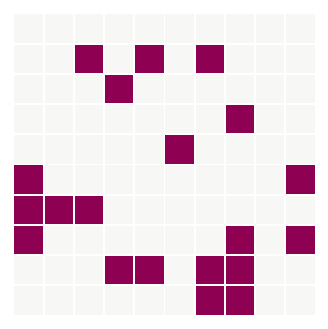

In [3]:
printMazeHM(mz1)

The dark purple cells above are blocked, whereas the white cells are open. The cells will be filled with various values after a search algorithm has been conducted.

### Search Algorithms

We implemented the following 5 search algorithms, which will either solve the maze with a successful path from $S$ to $G$, or return failure.

1. Depth-First Search **(DFS)**
2. Breadth-First Search **(BFS)**
3. **A*** with the heuristic set as the **Euclidean Distance**
4. **A*** with the heuristic set at the **Manhattan Distance**
5. Bi-Directional Breadth-First Search **(BD-BFS)**

All of the above algorithms have been implemented in `MazeRun.py` as functions, and they return the final maze as well as a list of the solved path, if applicable.

Using the map above with $dim = 10$ and $p = 0.2$, we demonstrate these algorithms below:

#### 1. DFS

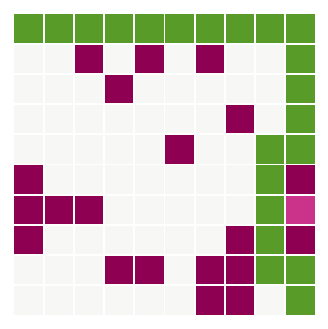

In [4]:
dfs_mz = deepcopy(mz1)
result, path = DFS(dfs_mz)
printMazeHM(result)

Green cells were taken on the correct solution path. Pink cells were visited, but ultimately not on the correct solution path.

#### 2. BFS

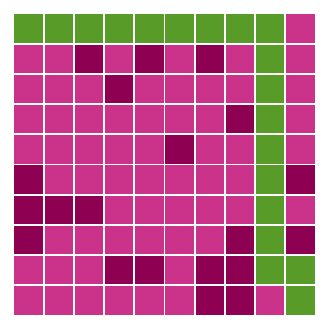

In [5]:
bfs_mz = deepcopy(mz1)
result, path = BFS(bfs_mz)
printMazeHM(result)

#### 3. A*, Euclidean distance heuristic

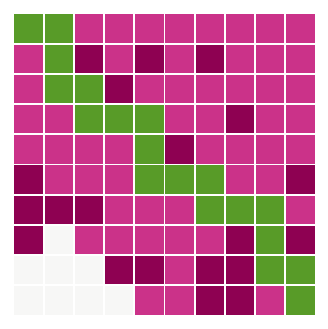

In [6]:
a_star_euclid_mz = deepcopy(mz1)
result, path = A_star(a_star_euclid_mz, dist_euclid)
printMazeHM(result)

#### 4. A*, Manhattan distance heuristic

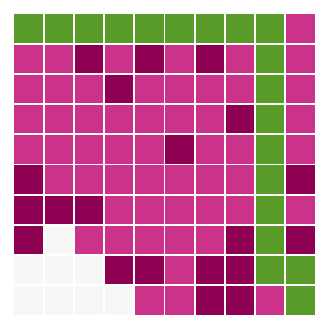

In [7]:
a_star_manhattan_mz = deepcopy(mz1)
result, path = A_star(a_star_manhattan_mz, dist_manhattan)
printMazeHM(result)

#### 5. BD-BFS

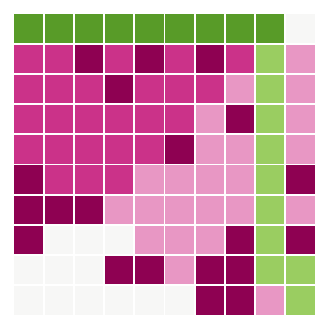

In [8]:
bdbfs_mz = deepcopy(mz1)
result, path = bdBFS(bdbfs_mz)
printMazeHM(result)

For BD-DFS, the search from the source 'down' is colored as usual. But the search from the goal 'up' is colored similarly, with light green cells being along the correct path, and lighter pink cells being visited but not along the correct path.

Note that the union of the dark and light green cells ultimately comprise the final solution path.

## Algorithm Analysis & Comparison

Moving forward, we wish to analyze these algorithms. For this, we use the driver function `algoTrialDriver(dim, wall_probability, algo, num_trials)` to drive our simulations. This function will perform $n$ trials of the selected algorithm, and return the following values:

1. Solvability ratio $p_S \in [0,1]$: proportion of trials which were solved successfully
2. Average runtime per trial, in seconds

**Note:** As runtime is machine-dependent, we provide the specifications for the machine used to conduct trials:

- Apple MacBook Pro (Retina, 13-inch, Early 2015)
- 2.9 GHz Intel Core i5 Processor
- 8 GB 1867 MHz DDR3
- macOS Mojave, version 10.14.5

### Finding a suitable map size

We wish to find a map size ($dim$) that is large enough to produce sufficiently difficult maps but not too large such that our algorithms are no longer runnable (in terms of runtime) for a variety of $p$ values. Again, $p$ is the probability of any given map cell being blocked.

It can be assumed that as $dim$ increases, the difficulty of the map is strictly increasing. Therefore, we seek the maximal $dim$ such that the corresponding map is still solvable in reasonable time. 

We define a reasonable trial time as $t \leq 3$ seconds per trial.

The below code simulates $n = 32$ trials for each algorithm with $dim \in [25, 400]$ and $p \in \{0.2, 0.4, 0.6, 0.8\}$. Then, it records average total runtime per $n$ $(dim,p)$ trials and graphs this average total runtime against $dim$.

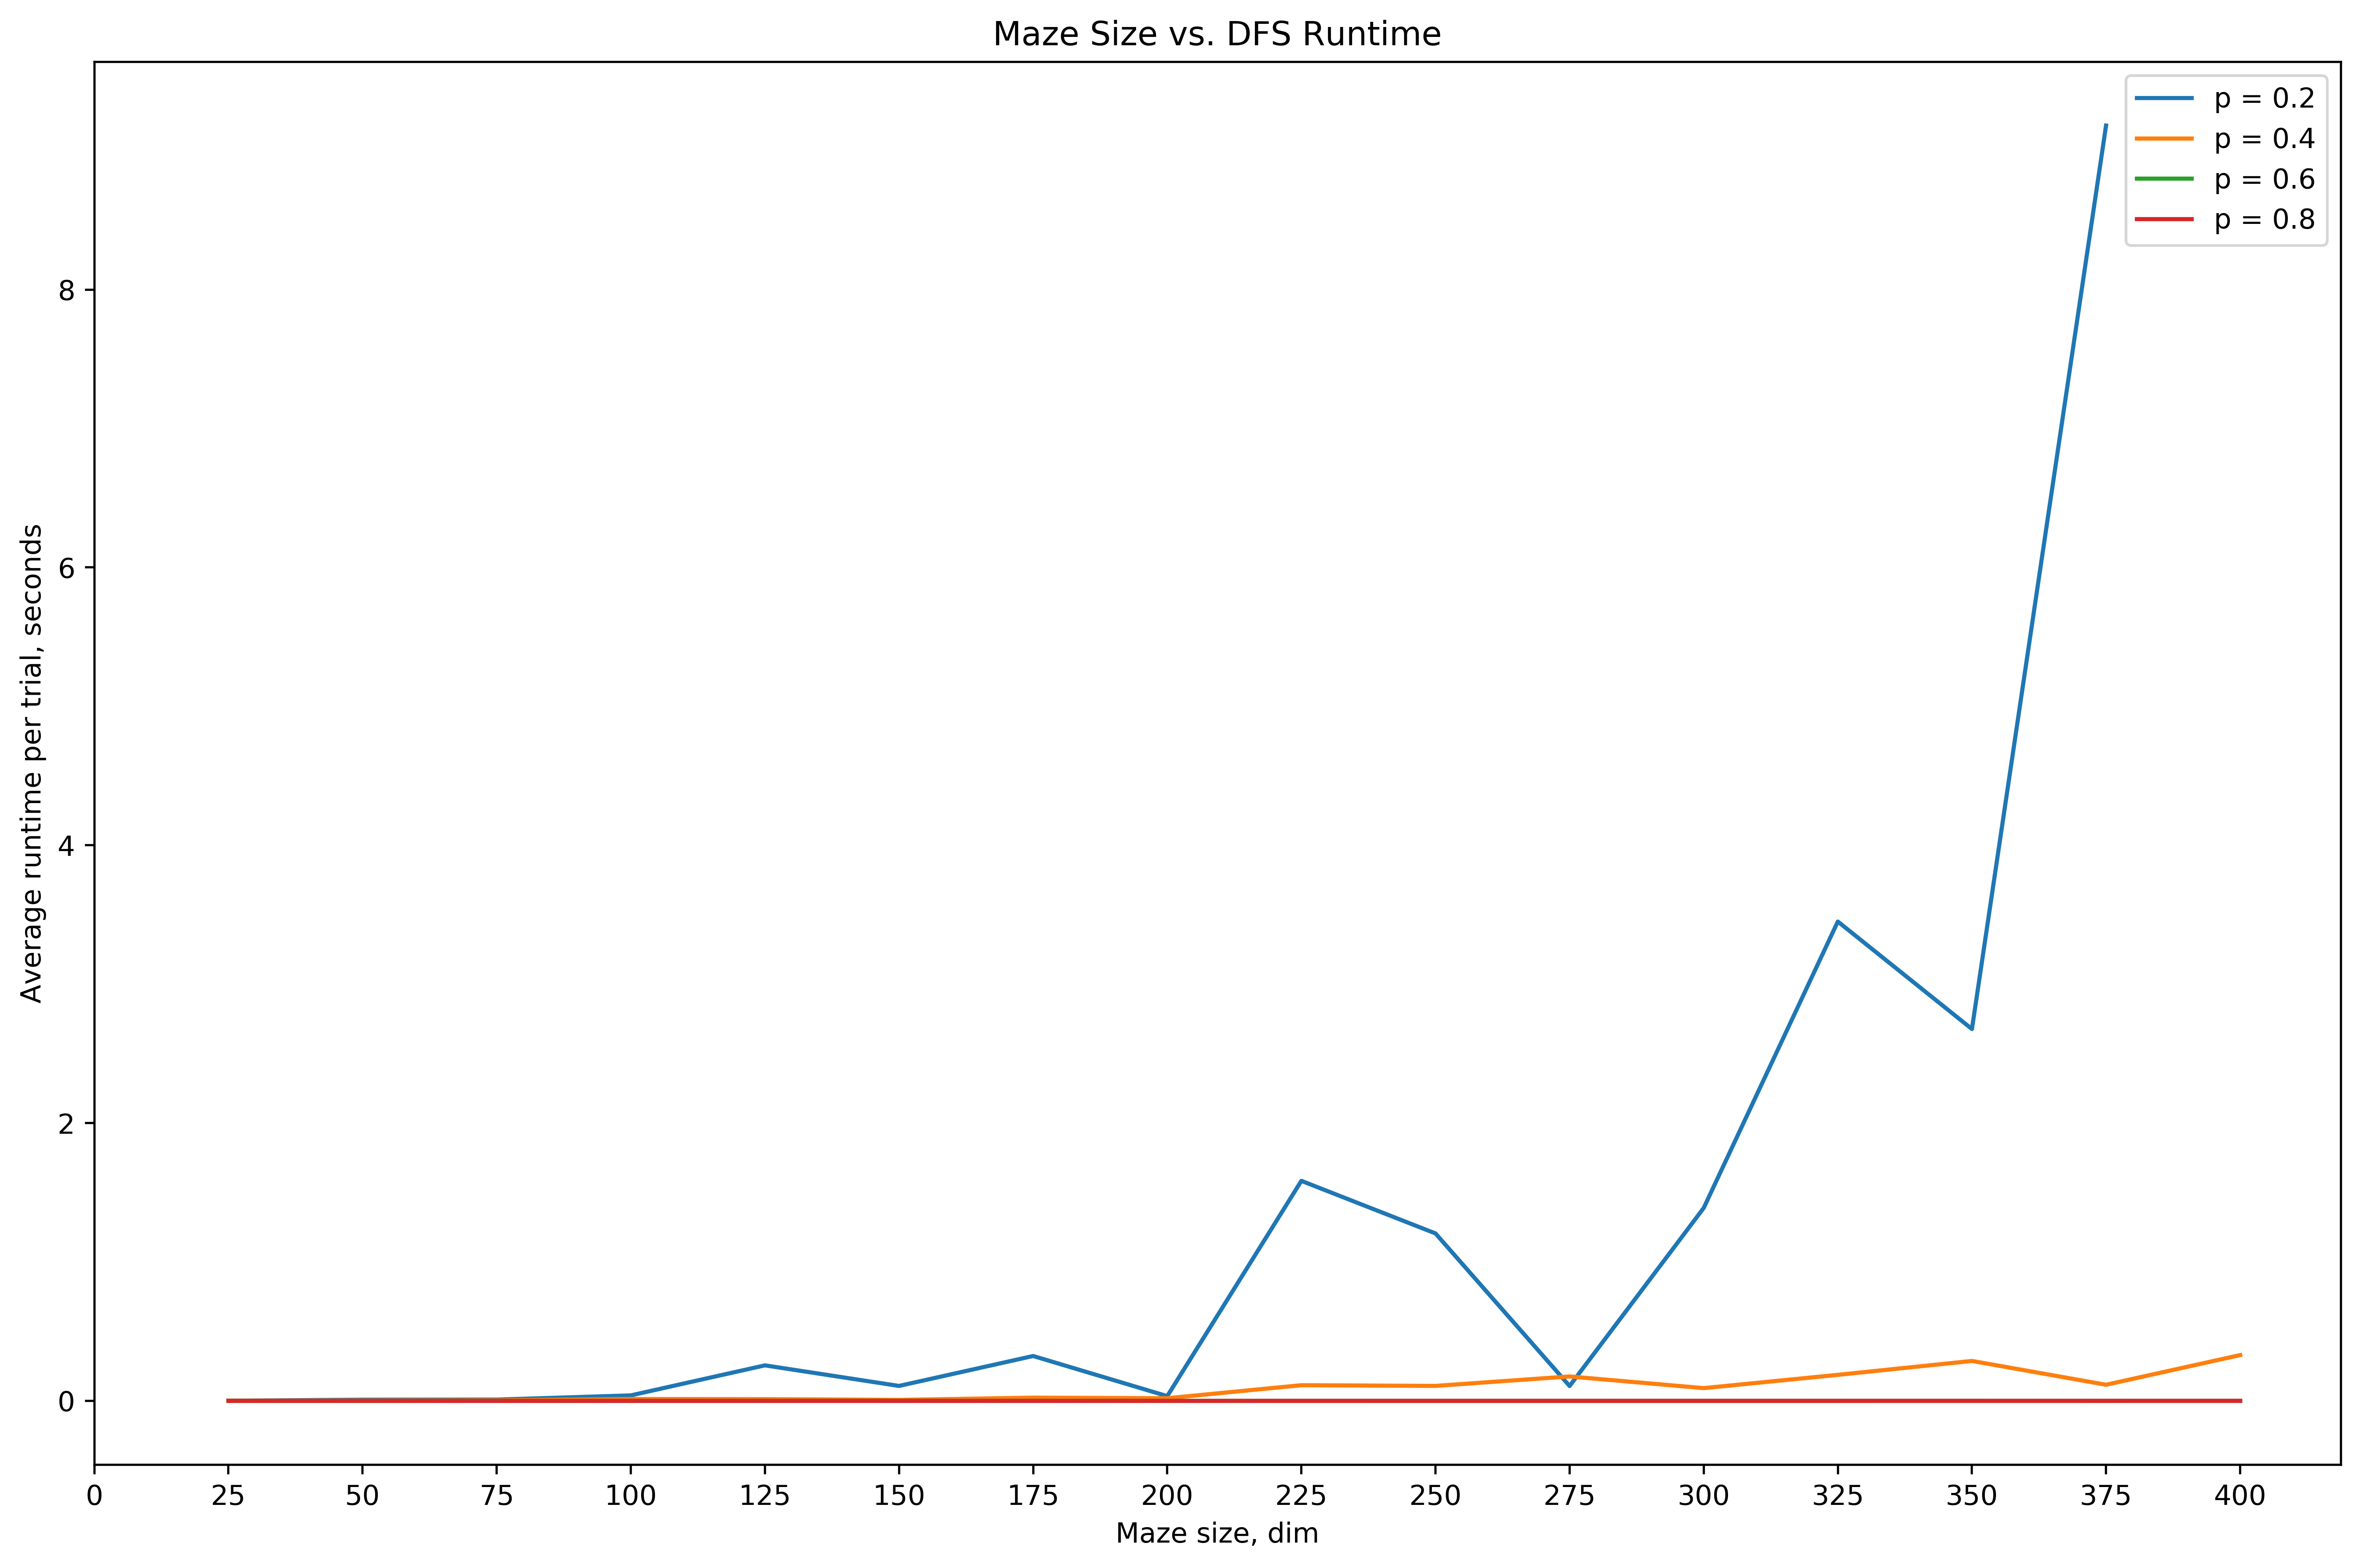

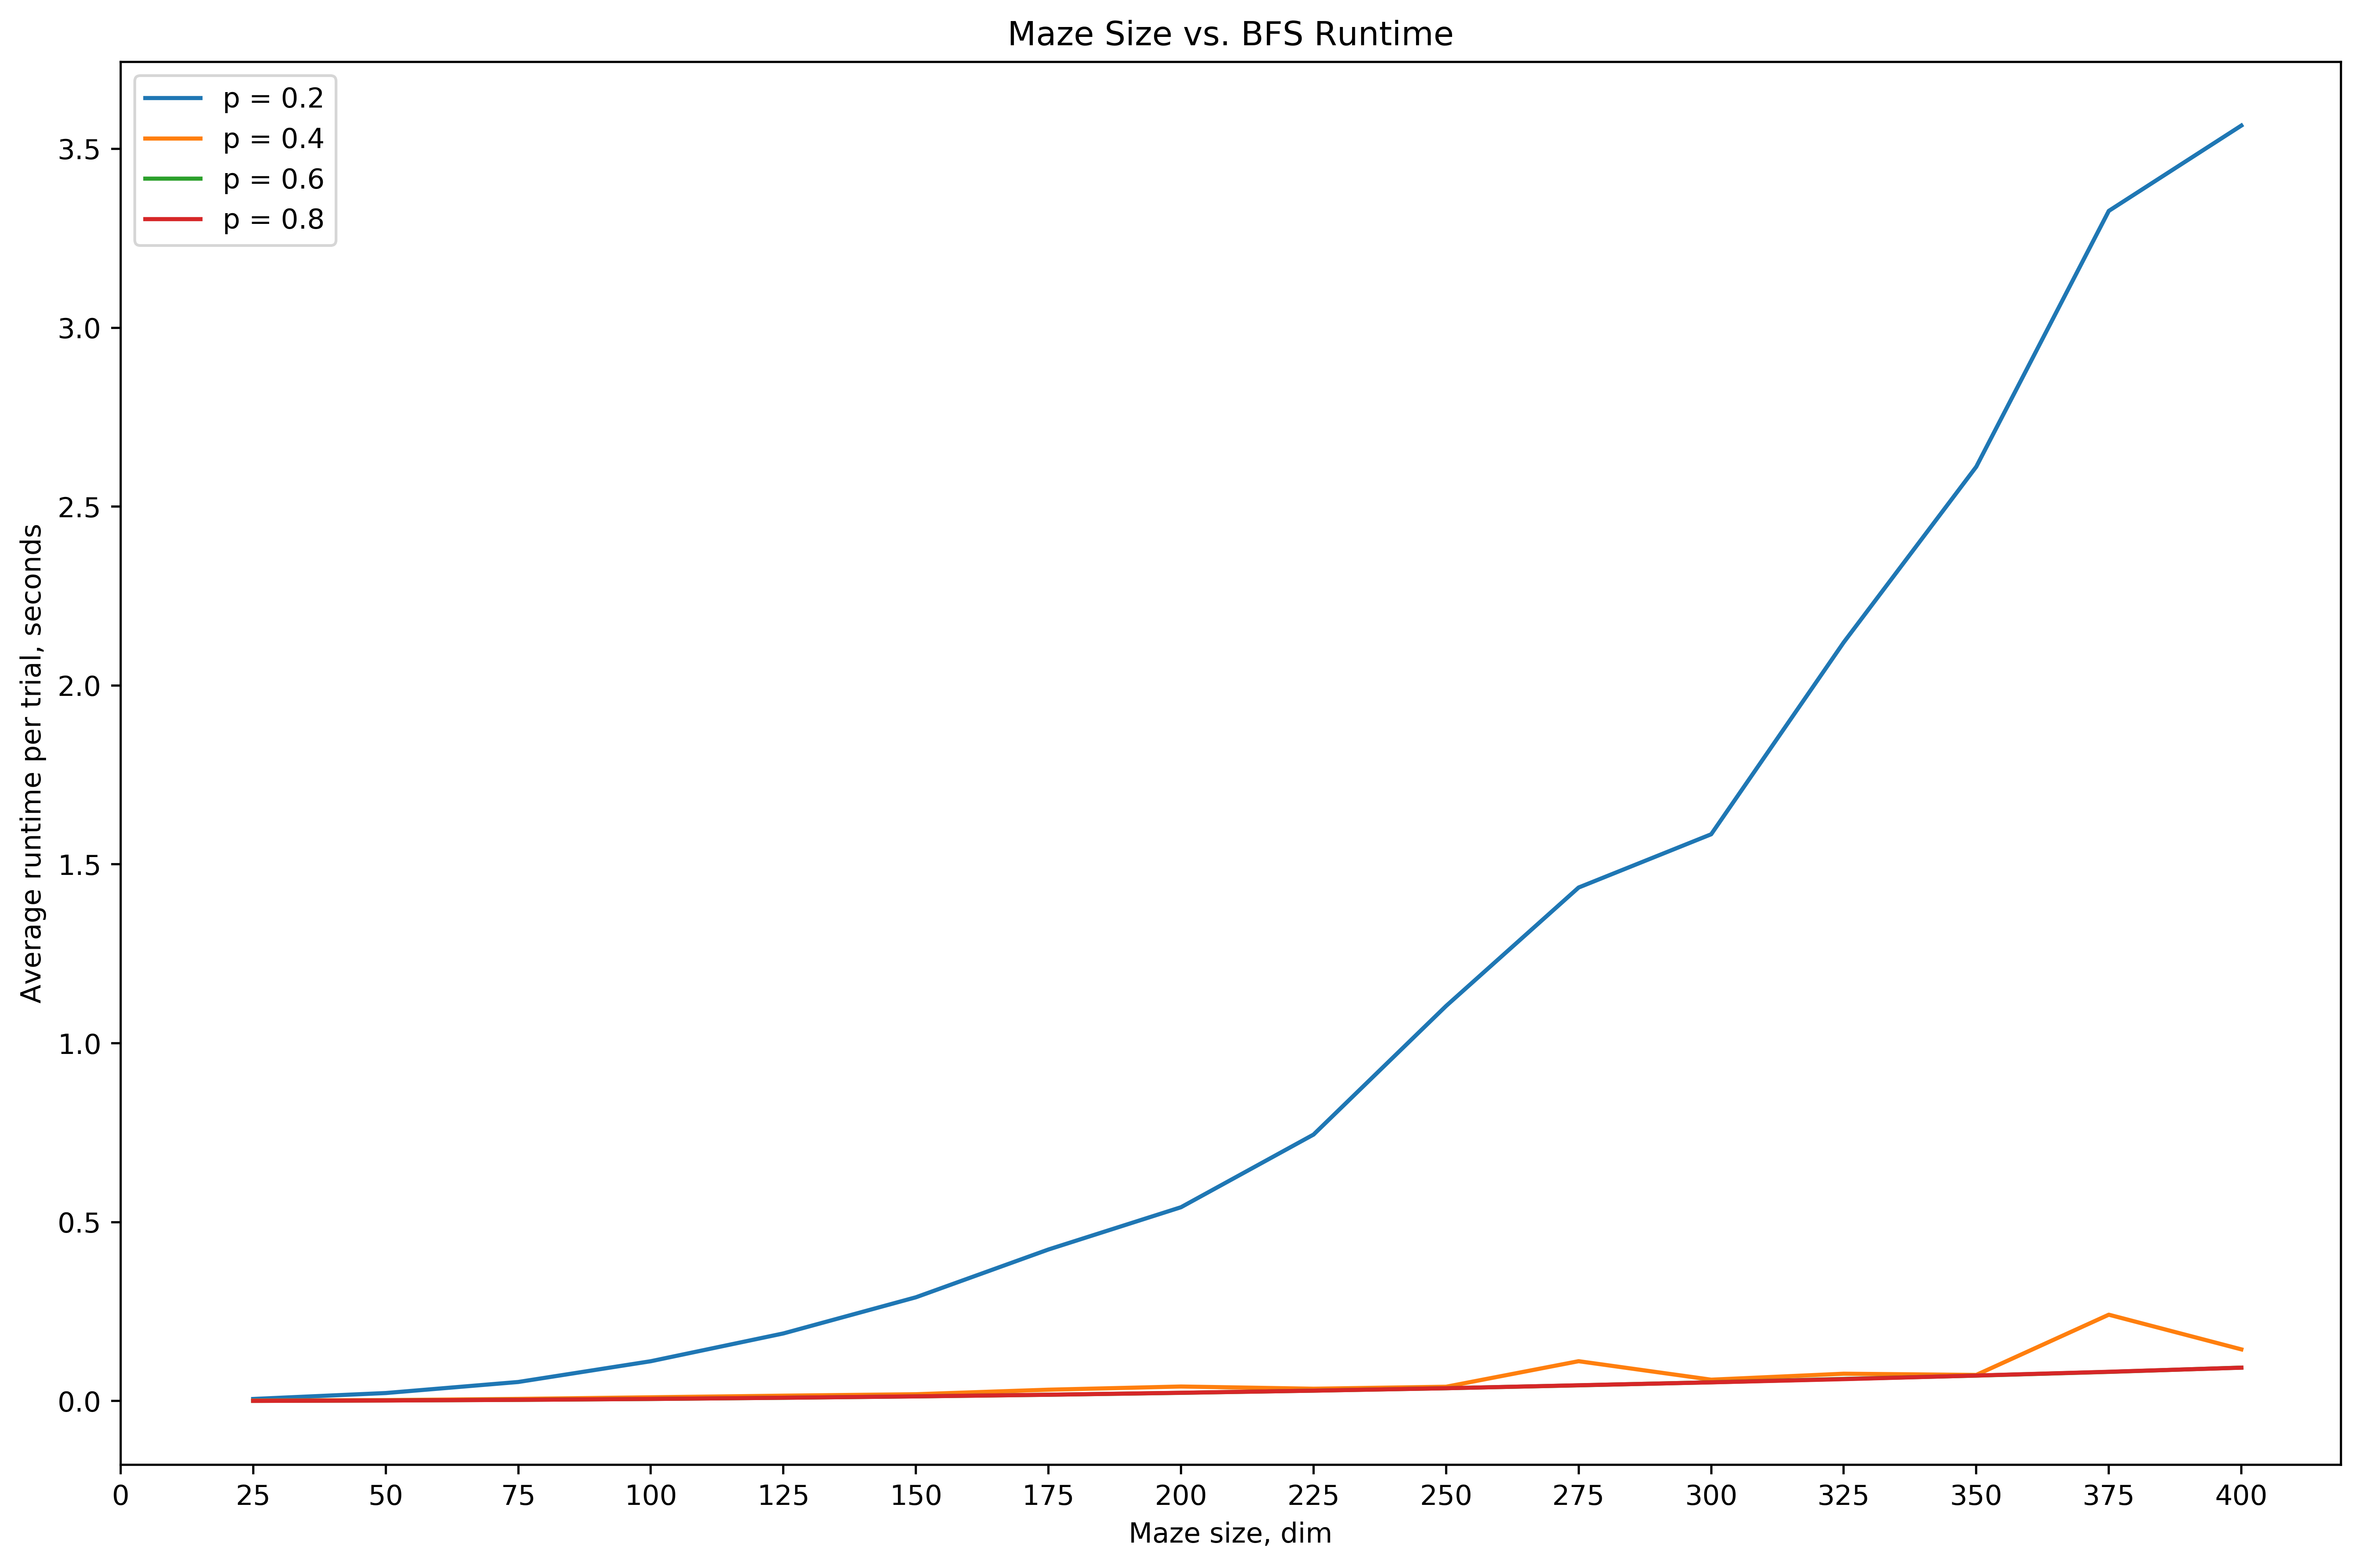

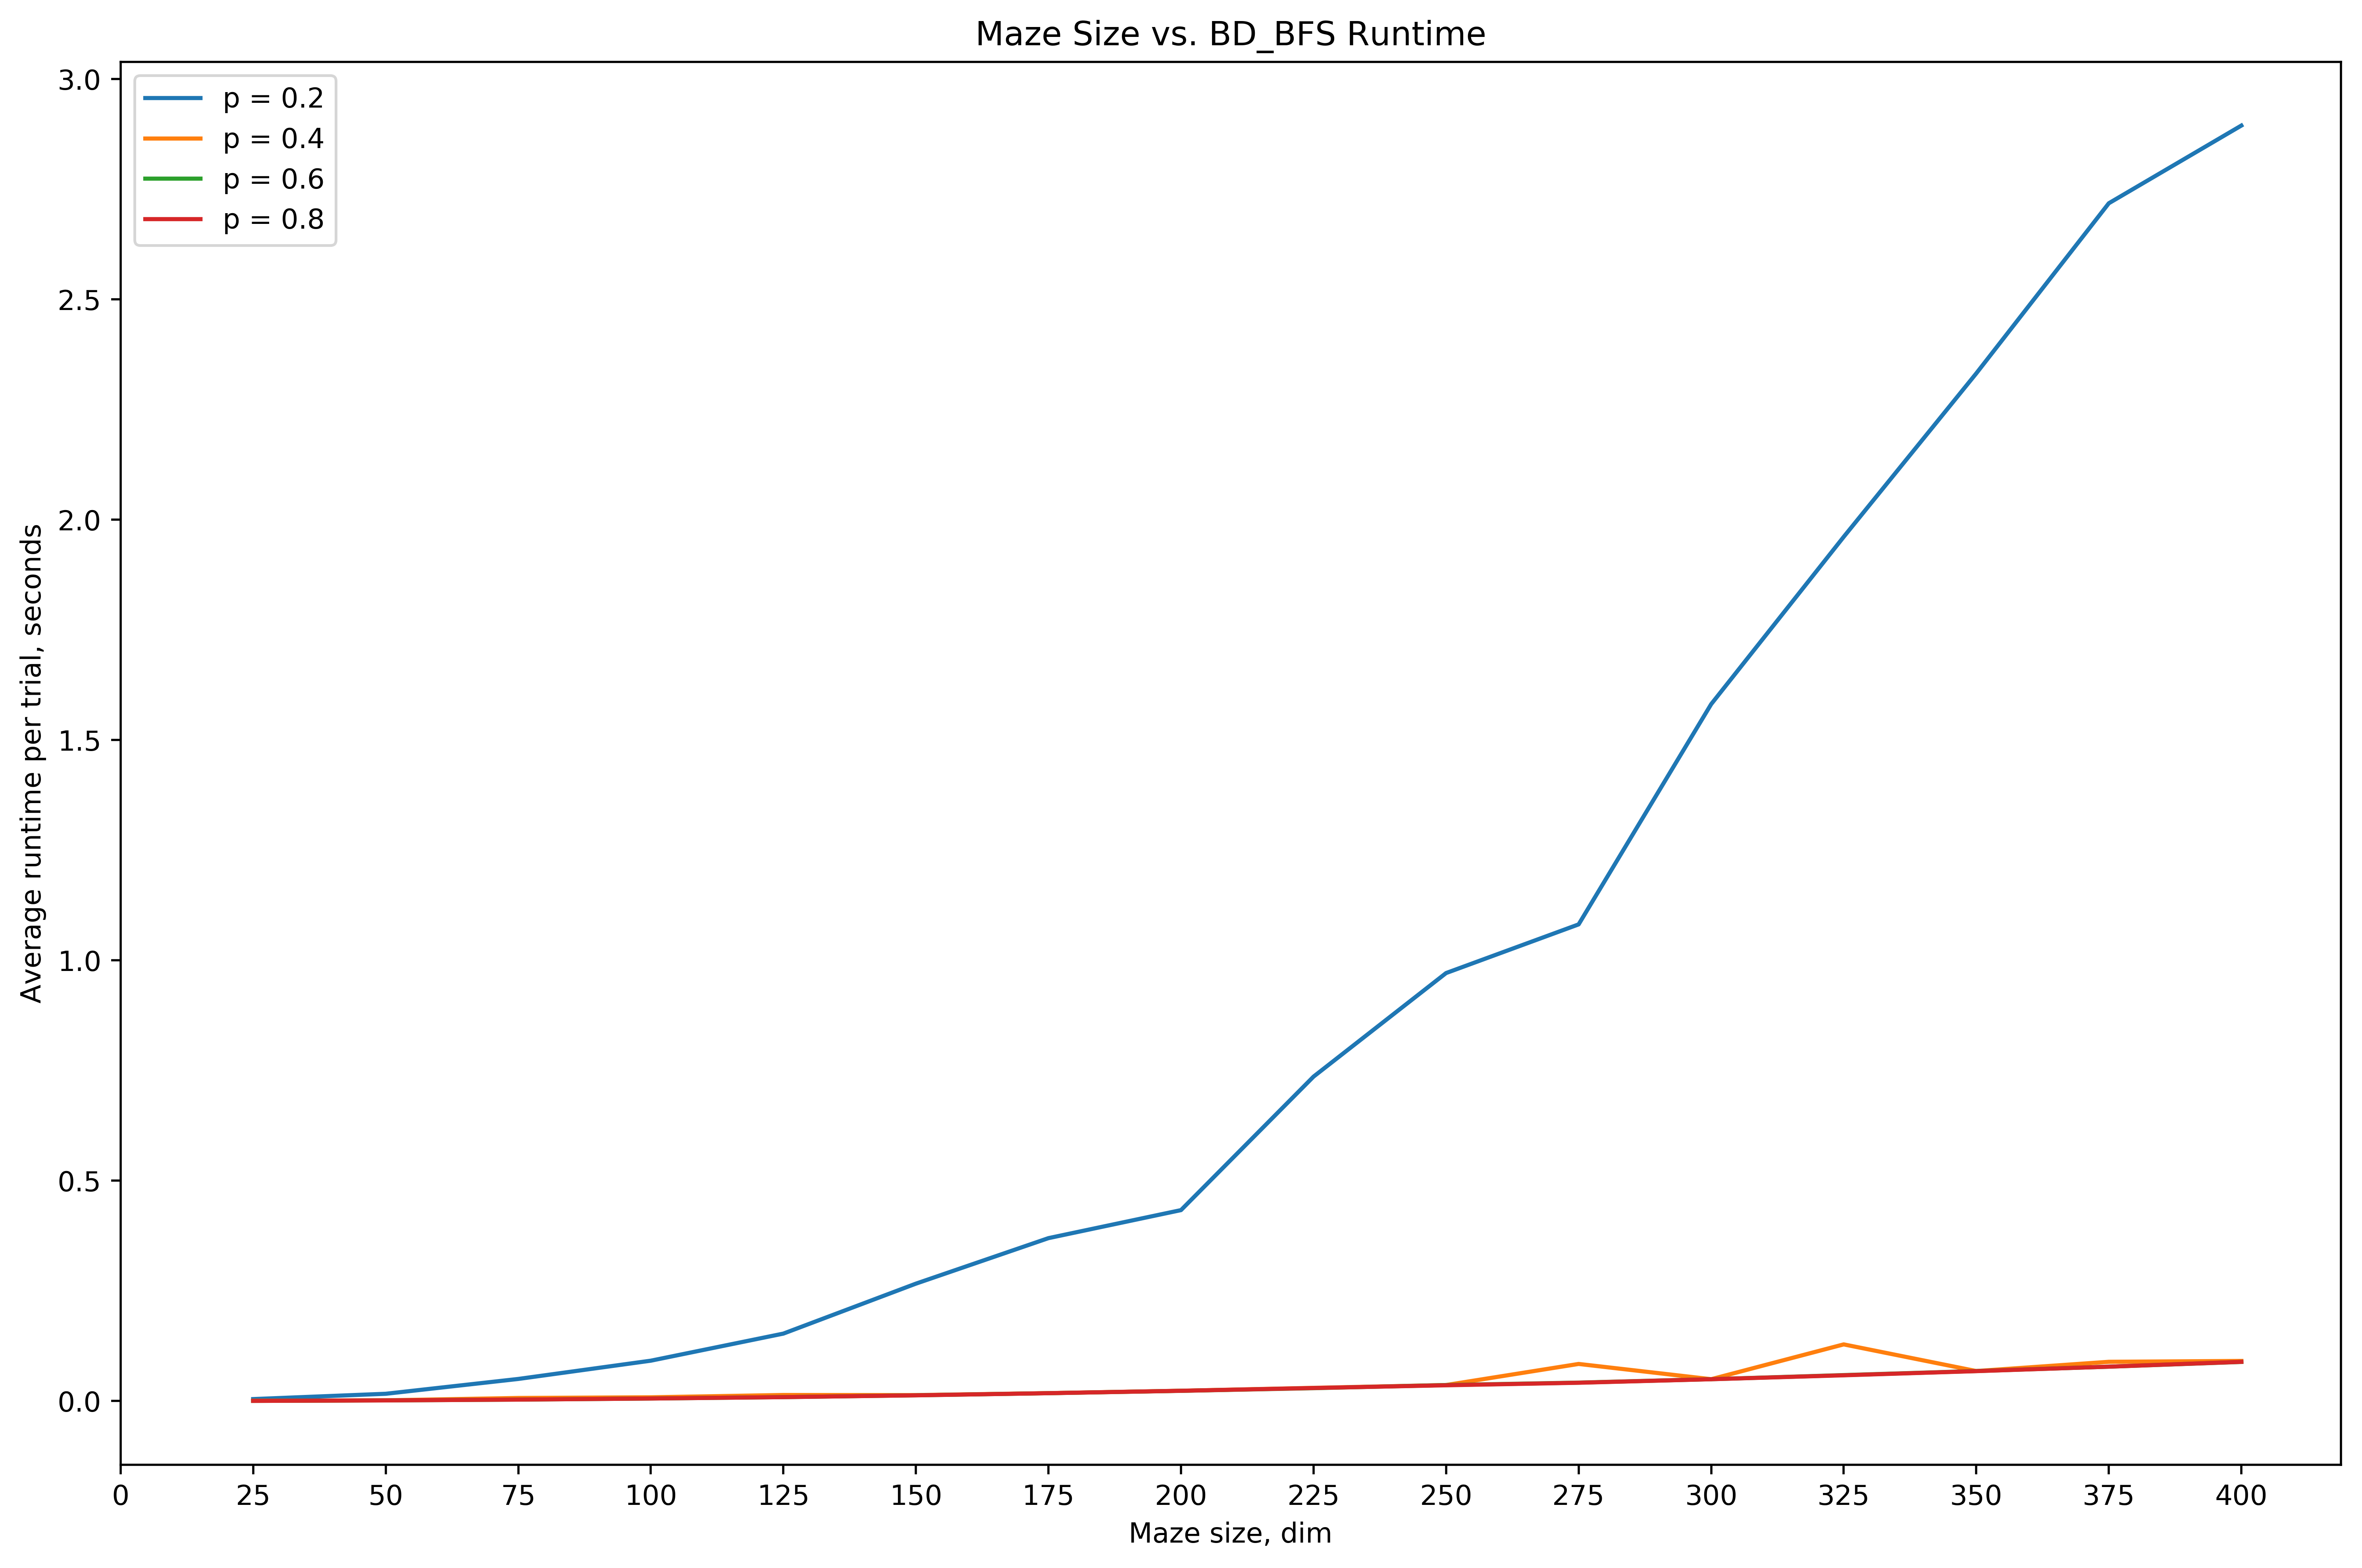

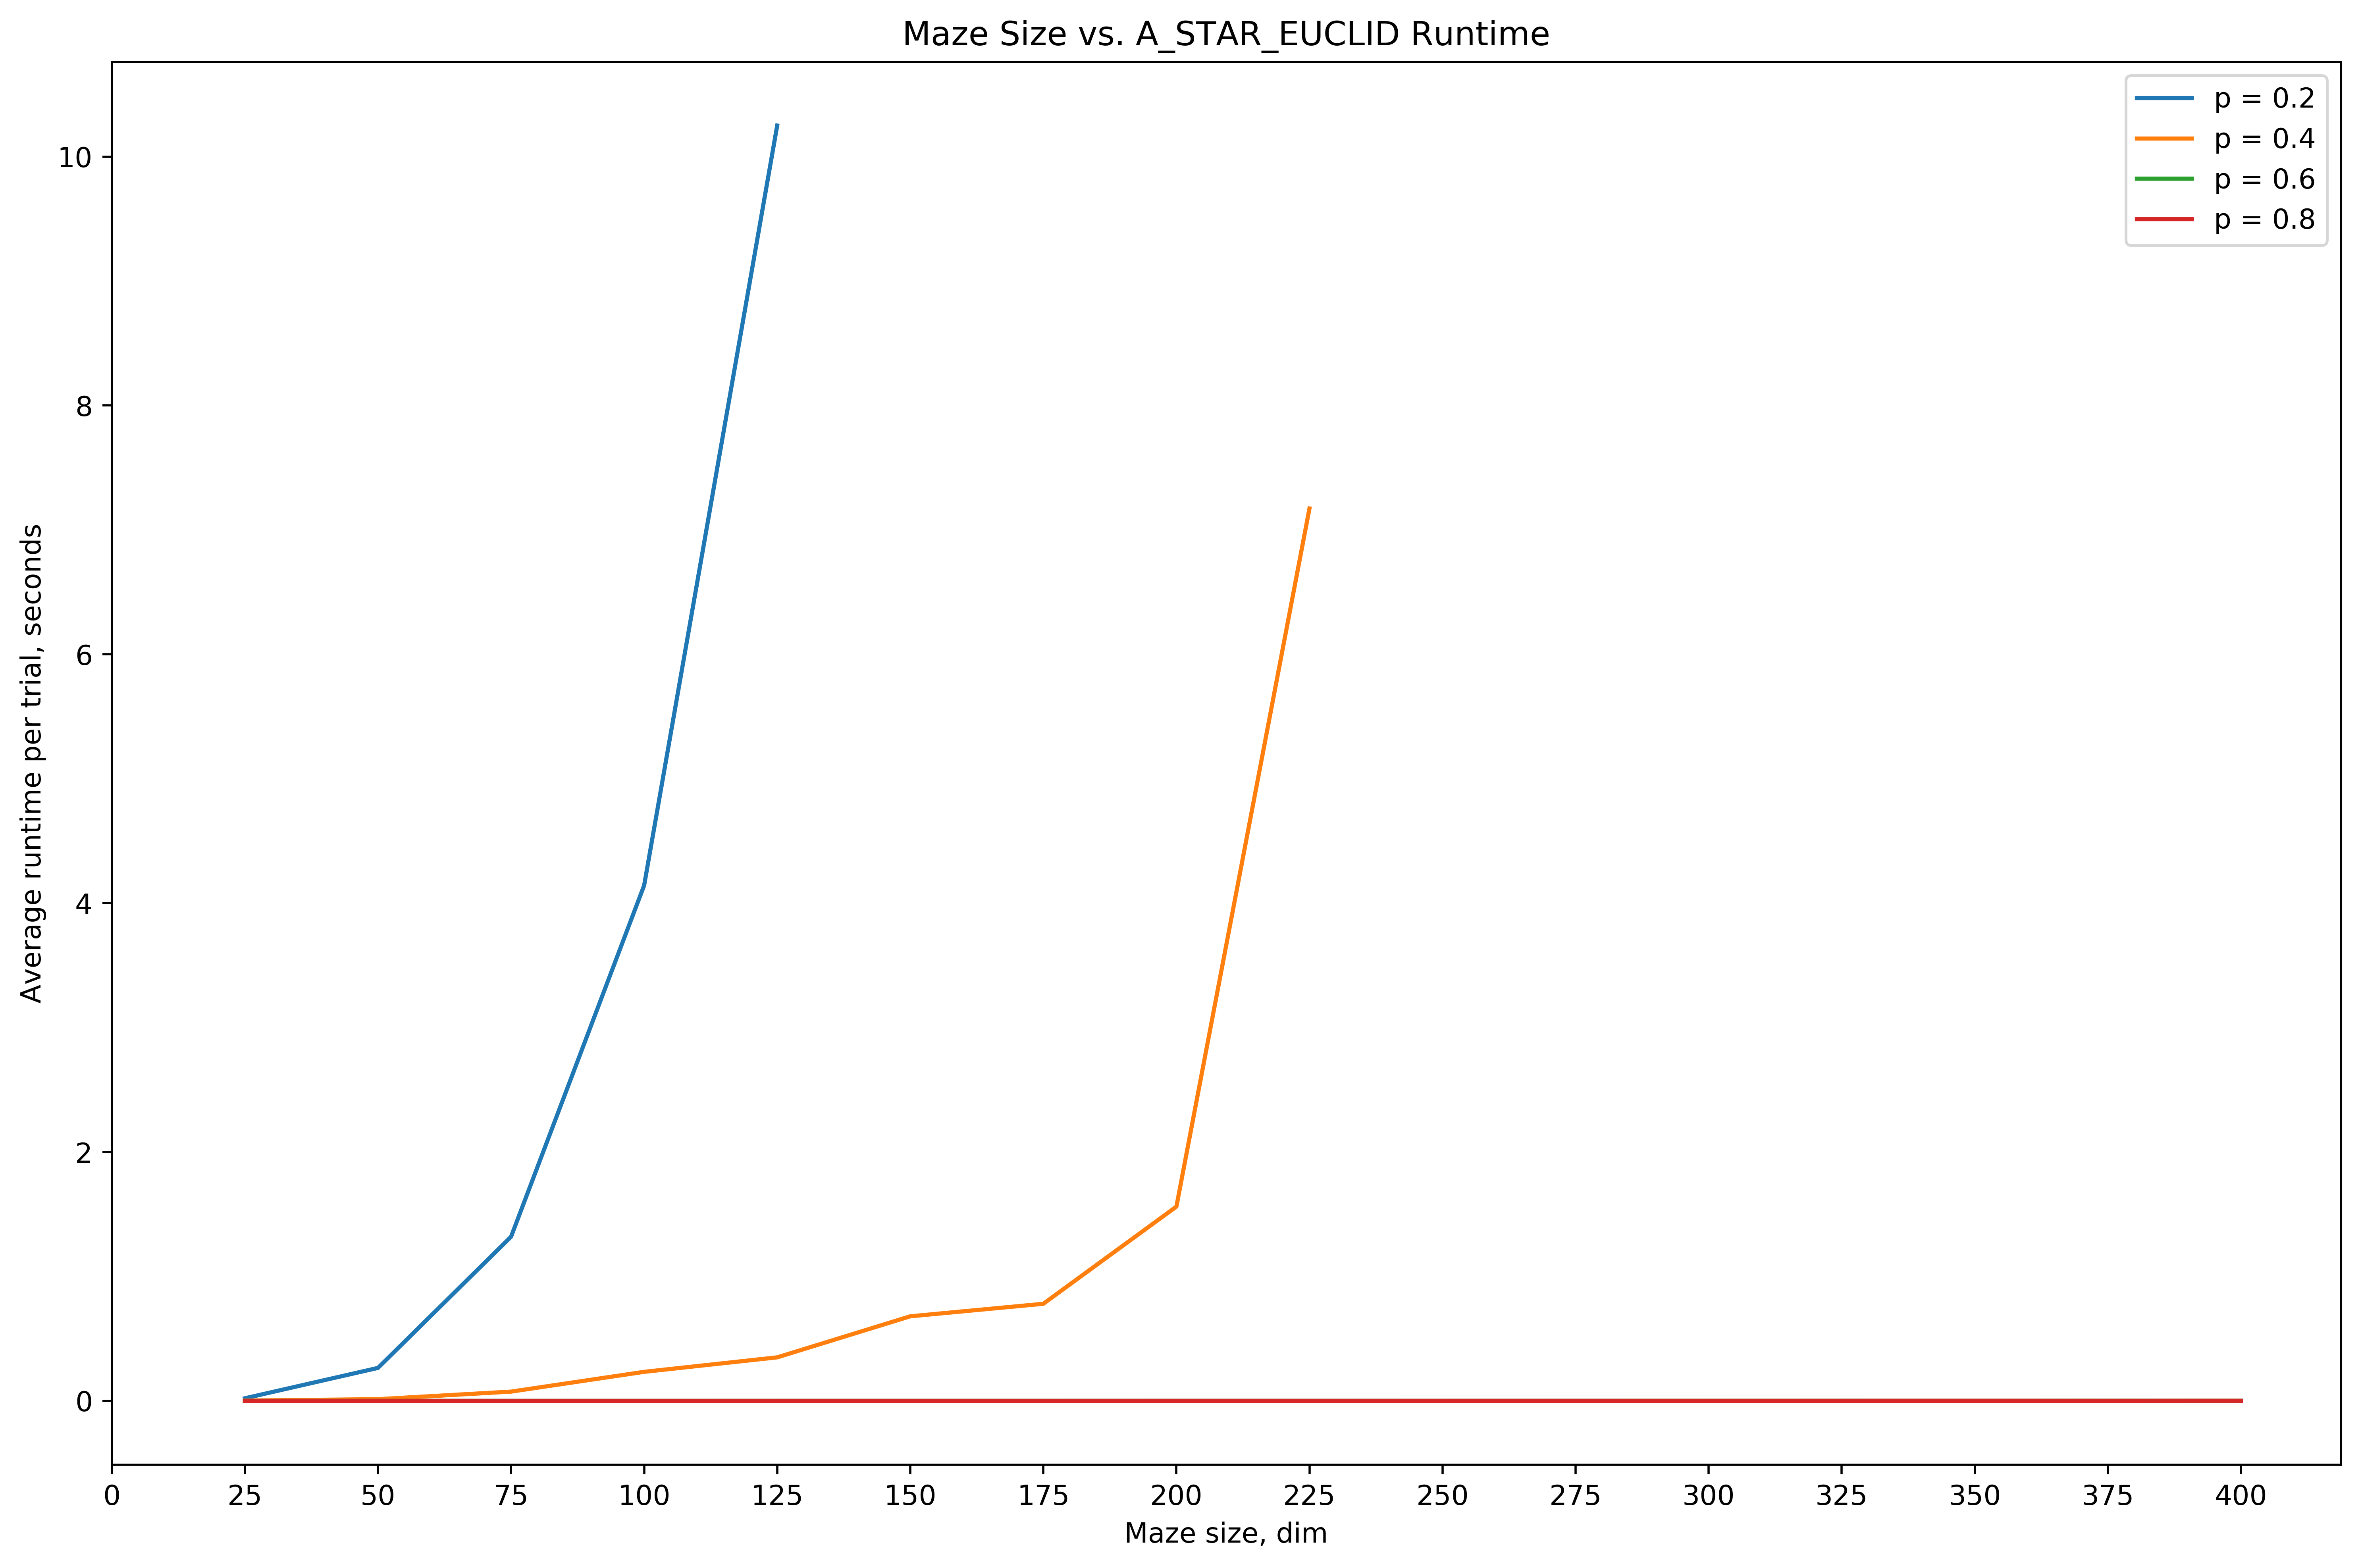

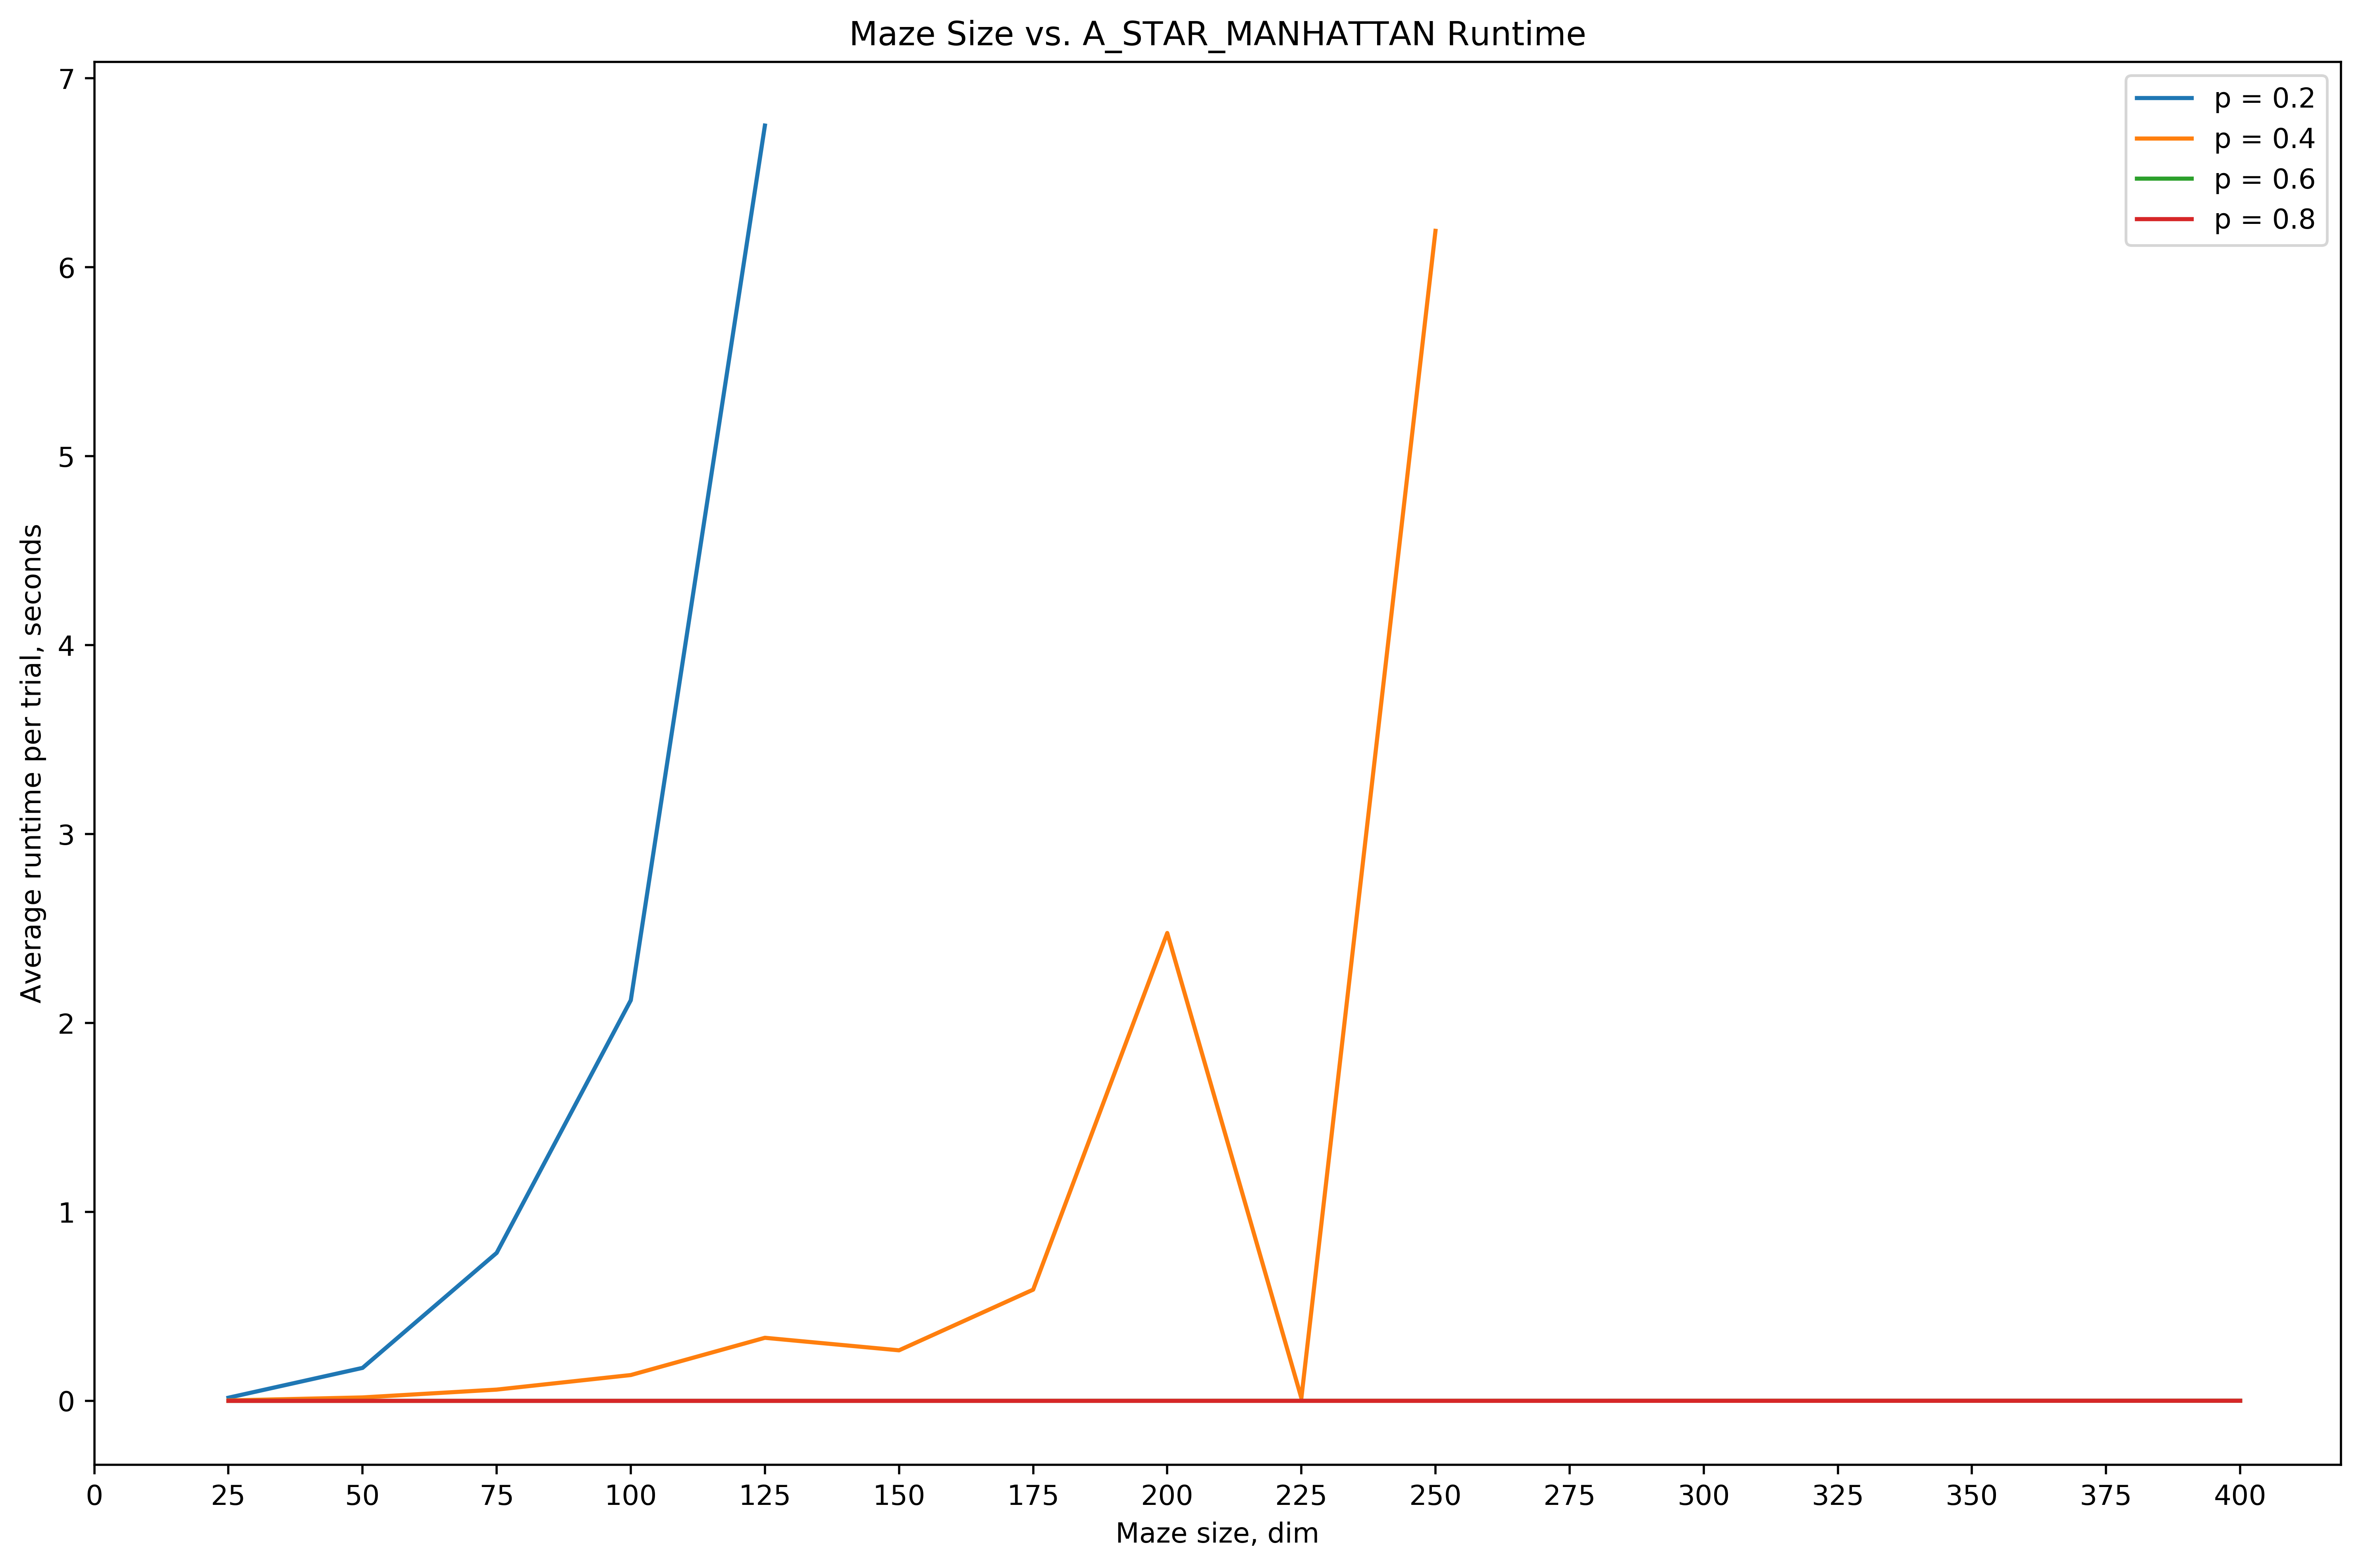

In [9]:
n = 32
p_range = [round(x,2) for x in np.arange(0.2, 1.0, 0.2)]
dim_range = [a for a in range(25, 401, 25)]
algos = ['DFS', 'BFS', 'BD_BFS', 'A_STAR_EUCLID', 'A_STAR_MANHATTAN']
dvr_algos = []

for algo in algos:
    dvr = []
    for p in p_range:
        dvr_row = []
        for dim in dim_range:
            # perform simulation
            solve_ratio, avg_runtime = algoTrialDriver(dim, p, algo, n)
            dvr_row.append(avg_runtime)
            # prevents loop from repeatedly executing longer trials past 6s
            if(avg_runtime > 6):
                break
        dvr.append(dvr_row)
    # make a nice DataFrame of it
    dvr_df = pd.DataFrame(dvr)
    dvr_df.columns = ['dim = {}'.format(dim) for dim in dim_range]
    dvr_df.index = ['p = {}'.format(p) for p in p_range]
    # graph dim versus runtime
    plt.figure(figsize=(12,8), dpi=500)
    for row in dvr_df.iterrows():
        plt.plot(dim_range, row[1].values)
    plt.xlabel('Maze size, dim')
    plt.xticks([x for x in range(0,401,25)])
    plt.ylabel('Average runtime per trial, seconds')
    plt.title('Maze Size vs. {} Runtime'.format(algo))
    plt.legend([('p = {}'.format(x)) for x in p_range])
    plt.tight_layout()
    plt.show()
    print('\n')
    # keep track of all the DataFrames
    dvr_algos.append((algo, dvr_df))

According to the data as visualized above, the appropriate $dim$ for which average trial solve time is reasonable at 3 seconds is approximately:

1. DFS: 315
2. BFS: 350
3. BD-BFS: 400
4. A* (Euclid): between 100 and 200
5. A* (Manhattan): between 100 and 225

It is clear that A* escalates runtime the quickest for increasing $dim$, whereas BD-BFS has a runtime which increases at the slowest rate. Hence, if we are to pick just one $dim$ for all algorithms, we choose the one which minimizes the slowest algorithm's runtime, i.e. A*'s runtime with either the Euclid or the Manhattan distance heuristic. 

Accordingly, the proper $dim$ should be between 100 and 225. Let $dim = 110$, such that in the worst case (which appears to be with lower $p$), A* will not take longer than approx. 5 seconds to run.

In [2]:
dim = 110

Given this $dim$, we can show the above algorithms solving maps with $p = 0.2$.

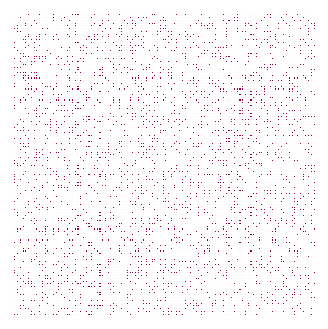

In [12]:
mz = generateMaze(dim, 0.2)
printMazeHM(mz)

#### DFS

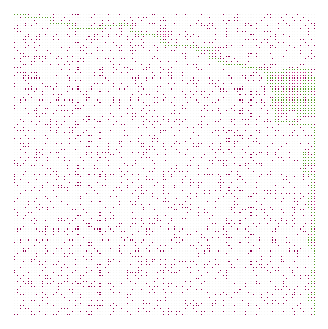

In [13]:
dfs_mz, dfs_path = DFS(deepcopy(mz))
printMazeHM(dfs_mz)

#### BFS

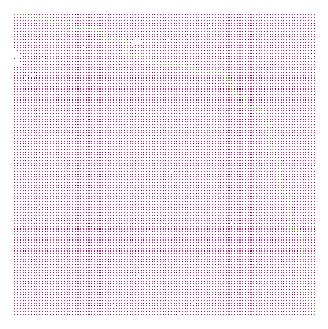

In [14]:
bfs_mz, bfs_path = BFS(deepcopy(mz))
printMazeHM(bfs_mz)

#### BD-BFS

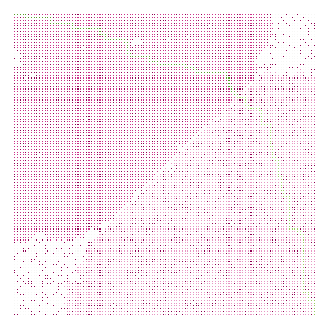

In [15]:
bdbfs_mz, bdbfs_path = bdBFS(deepcopy(mz))
printMazeHM(bdbfs_mz)

#### A* - Euclidean distance heuristic

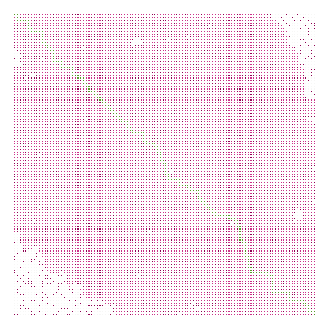

In [16]:
aStarEuc_mz, aStarEuc_path = A_star(deepcopy(mz), dist_euclid)
printMazeHM(aStarEuc_mz)

#### A* - Manhattan distance heuristic

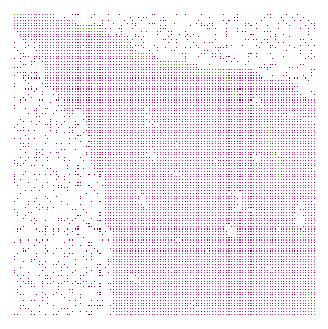

In [17]:
aStarMan_mz, aStarMan_path = A_star(deepcopy(mz), dist_manhattan)
printMazeHM(aStarMan_mz)

### Maze density $p$ versus solvability

Fixing the $dim$ from above, we want to analyze the relationship between maze density ($p$) and maze solvability. Ultimately, we want to define some threshold $p_0$ such that for $p < p_0$ most mazes are solvable, but for $p > p_0$, most mazes are not solvable.

To analyze this, we fix $dim$ and simulate $n = 100$ trials for various $p$ values. For each $p$, we define $P_p = \frac{X}{n}$ as the solvability of the maze with density $p$, where $X$ is the number of successes of the $n$ trials. Then, we plot $P_p$ against $p$ to observe the relationship between maze density and solvability. Then, we look for the largest possible $p = p_0$ such that the corresponding $P_{p_0} > 0.5$, i.e. most mazes with $p_0$ are solvable.

Importantly, since we are only concerned with solvability, we may use DFS only, because we are not concerned with finding shortest solutions. Hence, we may exploit the fast runtime of DFS to efficiently observe the targeted phenomena.

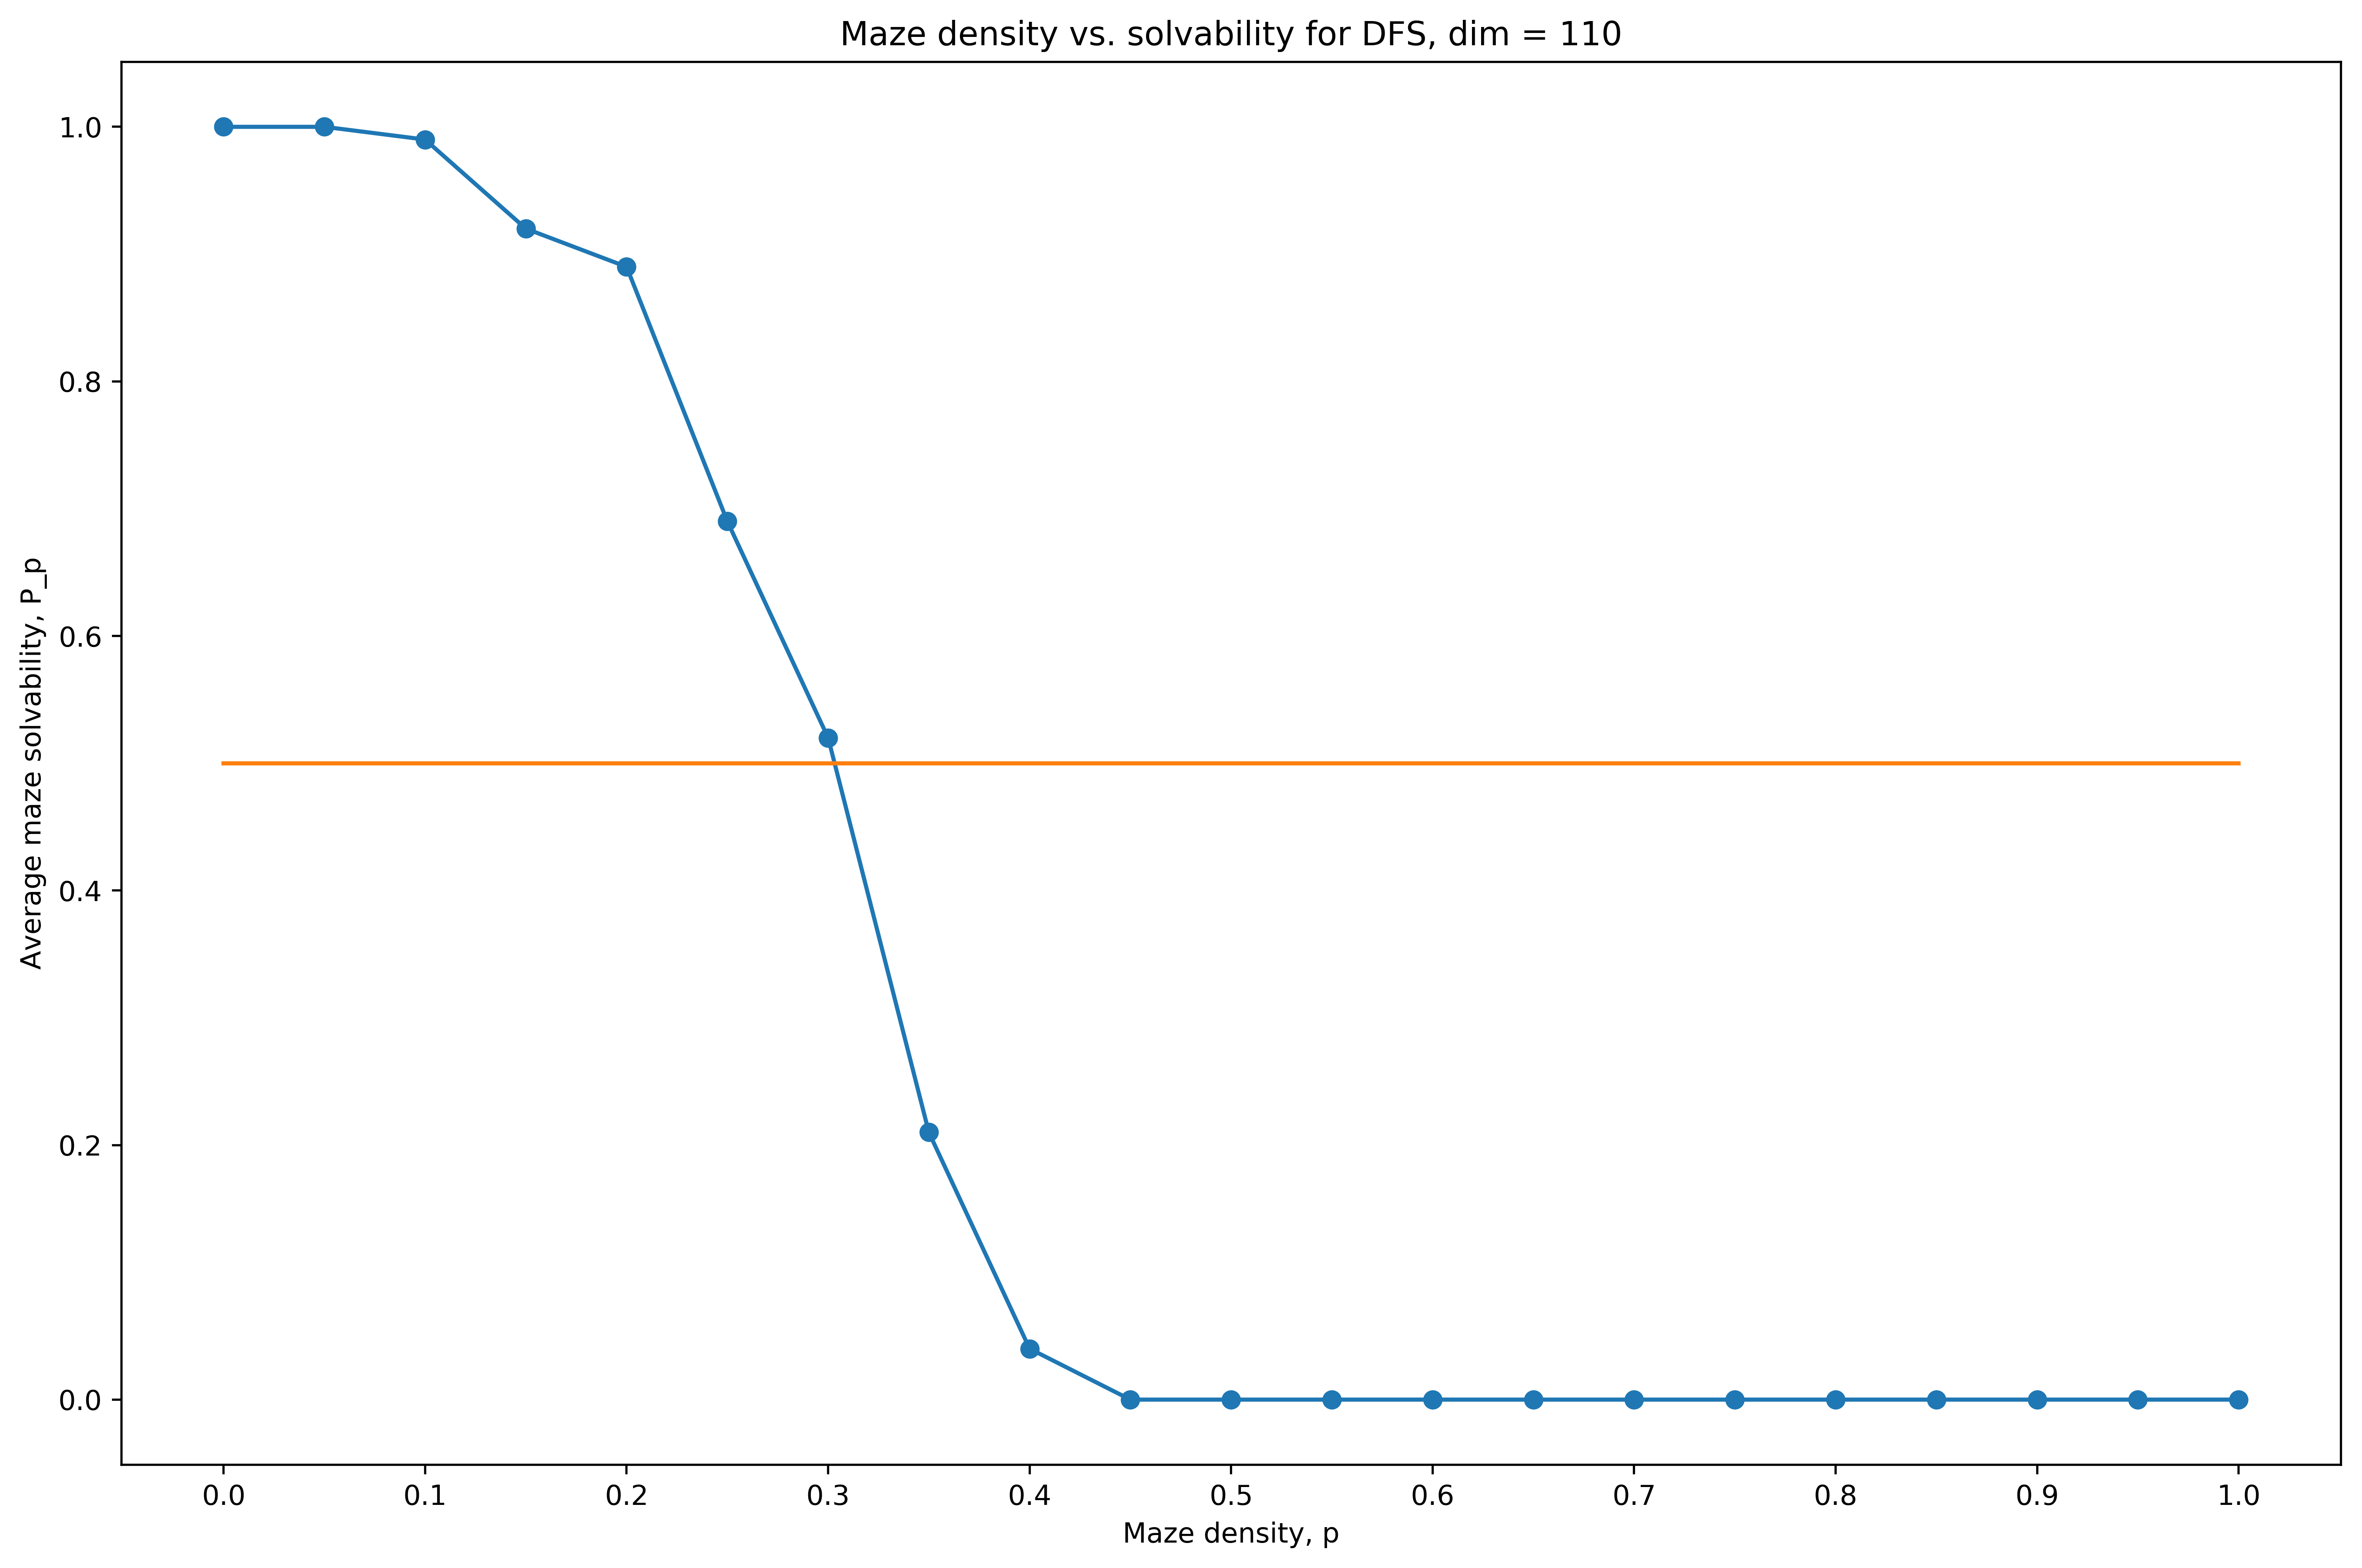

In [20]:
n = 100
p_range = [round(x,2) for x in np.arange(0.0, 1.05, 0.05)]
x_graph_range = [round(x,2) for x in np.arange(0.0, 1.1, 0.1)]
pvs = []

for p in p_range:
    # solve_ratio = P_p in the Markdown cell above
    solve_ratio, avg_runtime = algoTrialDriver(dim, p, 'DFS', n)
    pvs.append(solve_ratio)
# make a nice DataFrame
pvs_df = pd.DataFrame(pvs)
pvs_df.columns = ['P_p']
pvs_df.index = ['p = {}'.format(p) for p in p_range]
# graph P_p vs p
plt.figure(figsize=(12,8), dpi=500)
plt.scatter(p_range, pvs_df.values)
plt.plot(p_range, pvs_df.values)
plt.plot(x_graph_range, [0.5]*len(x_graph_range))
plt.xlabel('Maze density, p')
plt.xticks(x_graph_range)
plt.ylabel('Average maze solvability, P_p')
plt.title('Maze density vs. solvability for DFS, dim = {}'.format(dim))
plt.tight_layout()
plt.show()

As per the data visualized above, the appropriate $p_0$ is approximately $p_0 = 0.3$.

In [3]:
p_0 = 0.3

### Threshold $p_0$ and maze size

It is also of interest to analyze how the threshold probability $p_0$ selected above varies with maze size. We can simply repeat the above simulations with multiple maze sizes and observe how $p_0$ changes.

For efficiency's sake, we will also just use DFS as above, $n=50$, and $dim \in [10, 170]$.

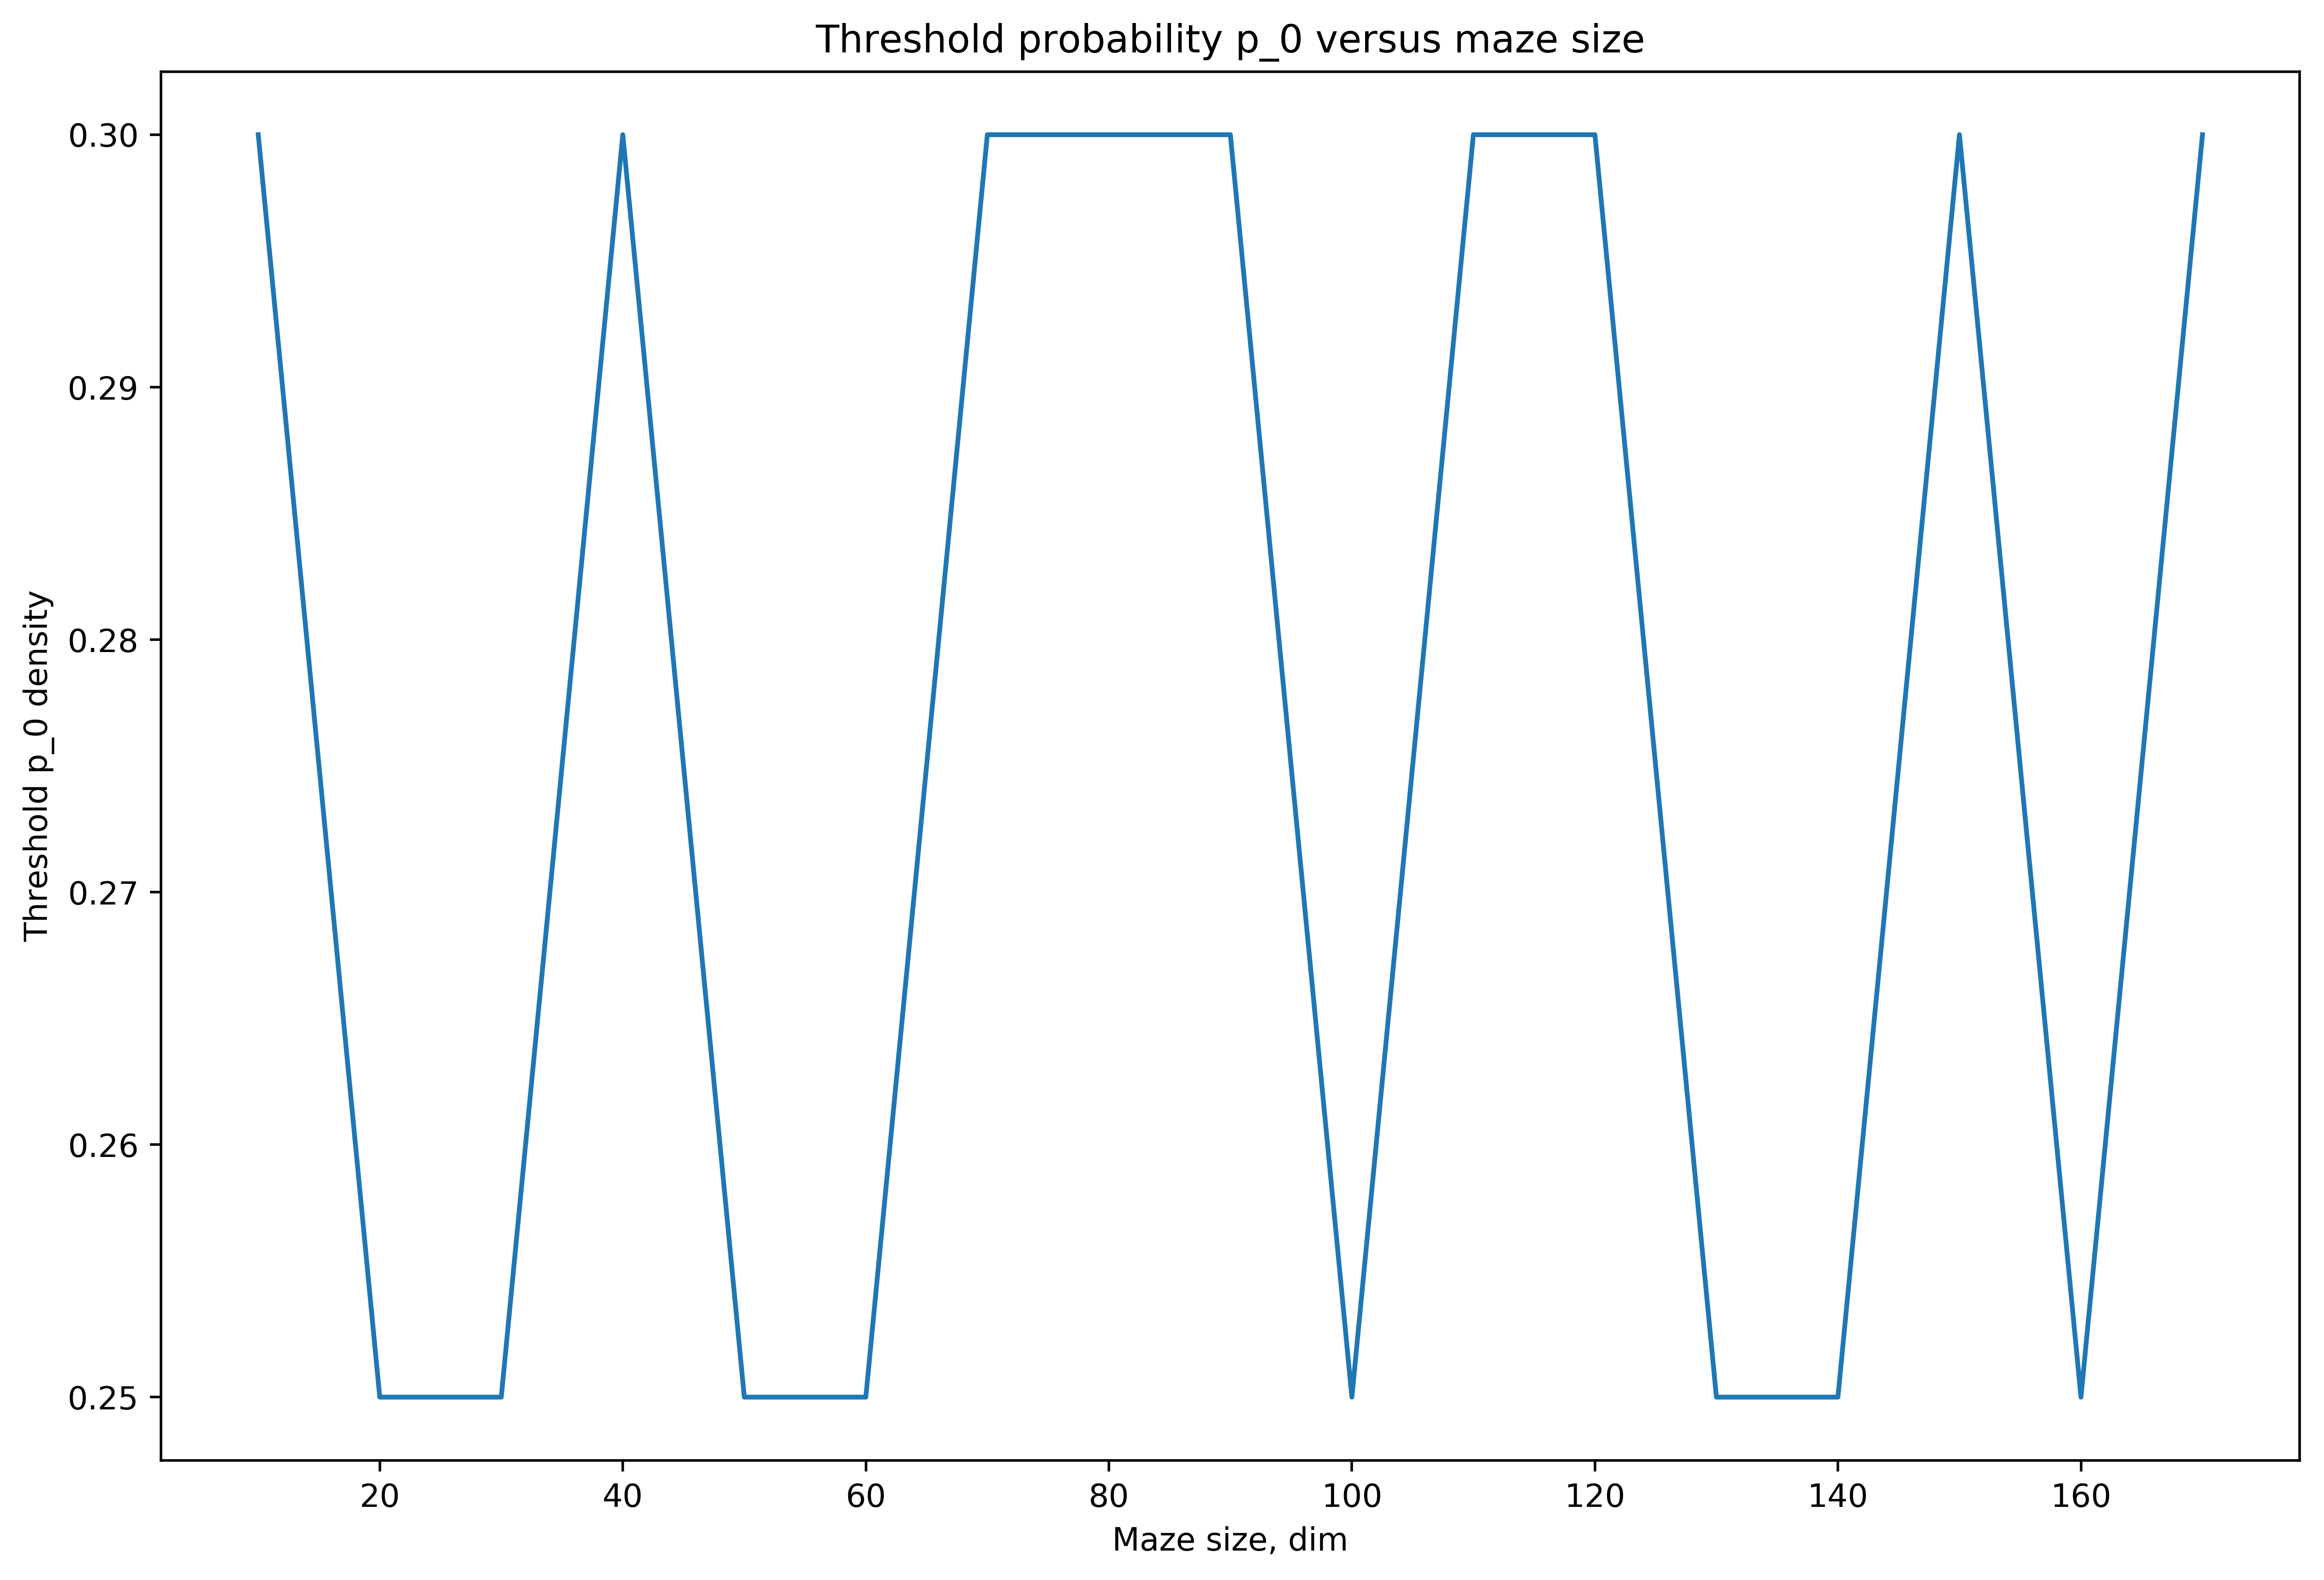

In [22]:
n = 50
p_range = [round(x,2) for x in np.arange(0, 1.05, 0.05)]
dim_range = [x for x in range(10, 171, 10)]
pvs_dims = []
for dim_i in dim_range:
    pvs = []
    for p in p_range:
        # solve_ratio = P_p in the Markdown cell above
        solve_ratio, avg_runtime = algoTrialDriver(dim_i, p, 'DFS', n)
        pvs.append(solve_ratio)
    # make a nice DataFrame
    pvs_df = pd.DataFrame(pvs)
    pvs_df.columns = ['P_p']
    pvs_df.index = [p for p in p_range]
    # find the P_0 for this dim: highest p s.t. solvability >= 0.5
    dim_P_0 = pvs_df[pvs_df['P_p'] >= 0.5].index.values[-1]
    pvs_dims.append(dim_P_0)
plt.figure(figsize=(12,8), dpi=500)
plt.plot(dim_range, pvs_dims)
plt.xlabel('Maze size, dim')
plt.ylabel('Threshold p_0 density')
plt.title('Threshold probability p_0 versus maze size')
plt.show()

We see that there is some sort of cyclical variation in the threshold $p_0$ as $dim$ increases, but this is likely due to sampling issues. Due to efficiency reasons, we elect not to test excessively large sample sizes. 

Instead, we note that while $dim$ increases, $p_0$ stays tightly in the range $[0.25, 0.3]$. Hence, for a variety of $dim$, the threshold $p_0$ is likely to be near the $p_0 = 0.3$ we keep constant for the remainder of this analysis.

### Maze density $p$ versus shortest path length

Furthermore, given the $p_0$ defined above, we seek to understand the relationship between maze density and how long the shortest paths are for solvable mazes. Therefore, for each algorithm, we run repeated simulations for fixed $dim$ and $p \in [0,p_0]$ as defined in the previous two sections and discard failures. Amongst the successes, we collect data of shortest path length.

Since BFS and BD-BFS are both guaranteed to return the shortest path, they could both find shortest path length in this analysis. But BD-BFS has a lower time and space complexity, i.e. $O(b^{m/2}) \leq O(b^m)$. Therefore, we use BD-BFS to more efficiently compare shortest path lengths across various $p \in [0, p_0]$.

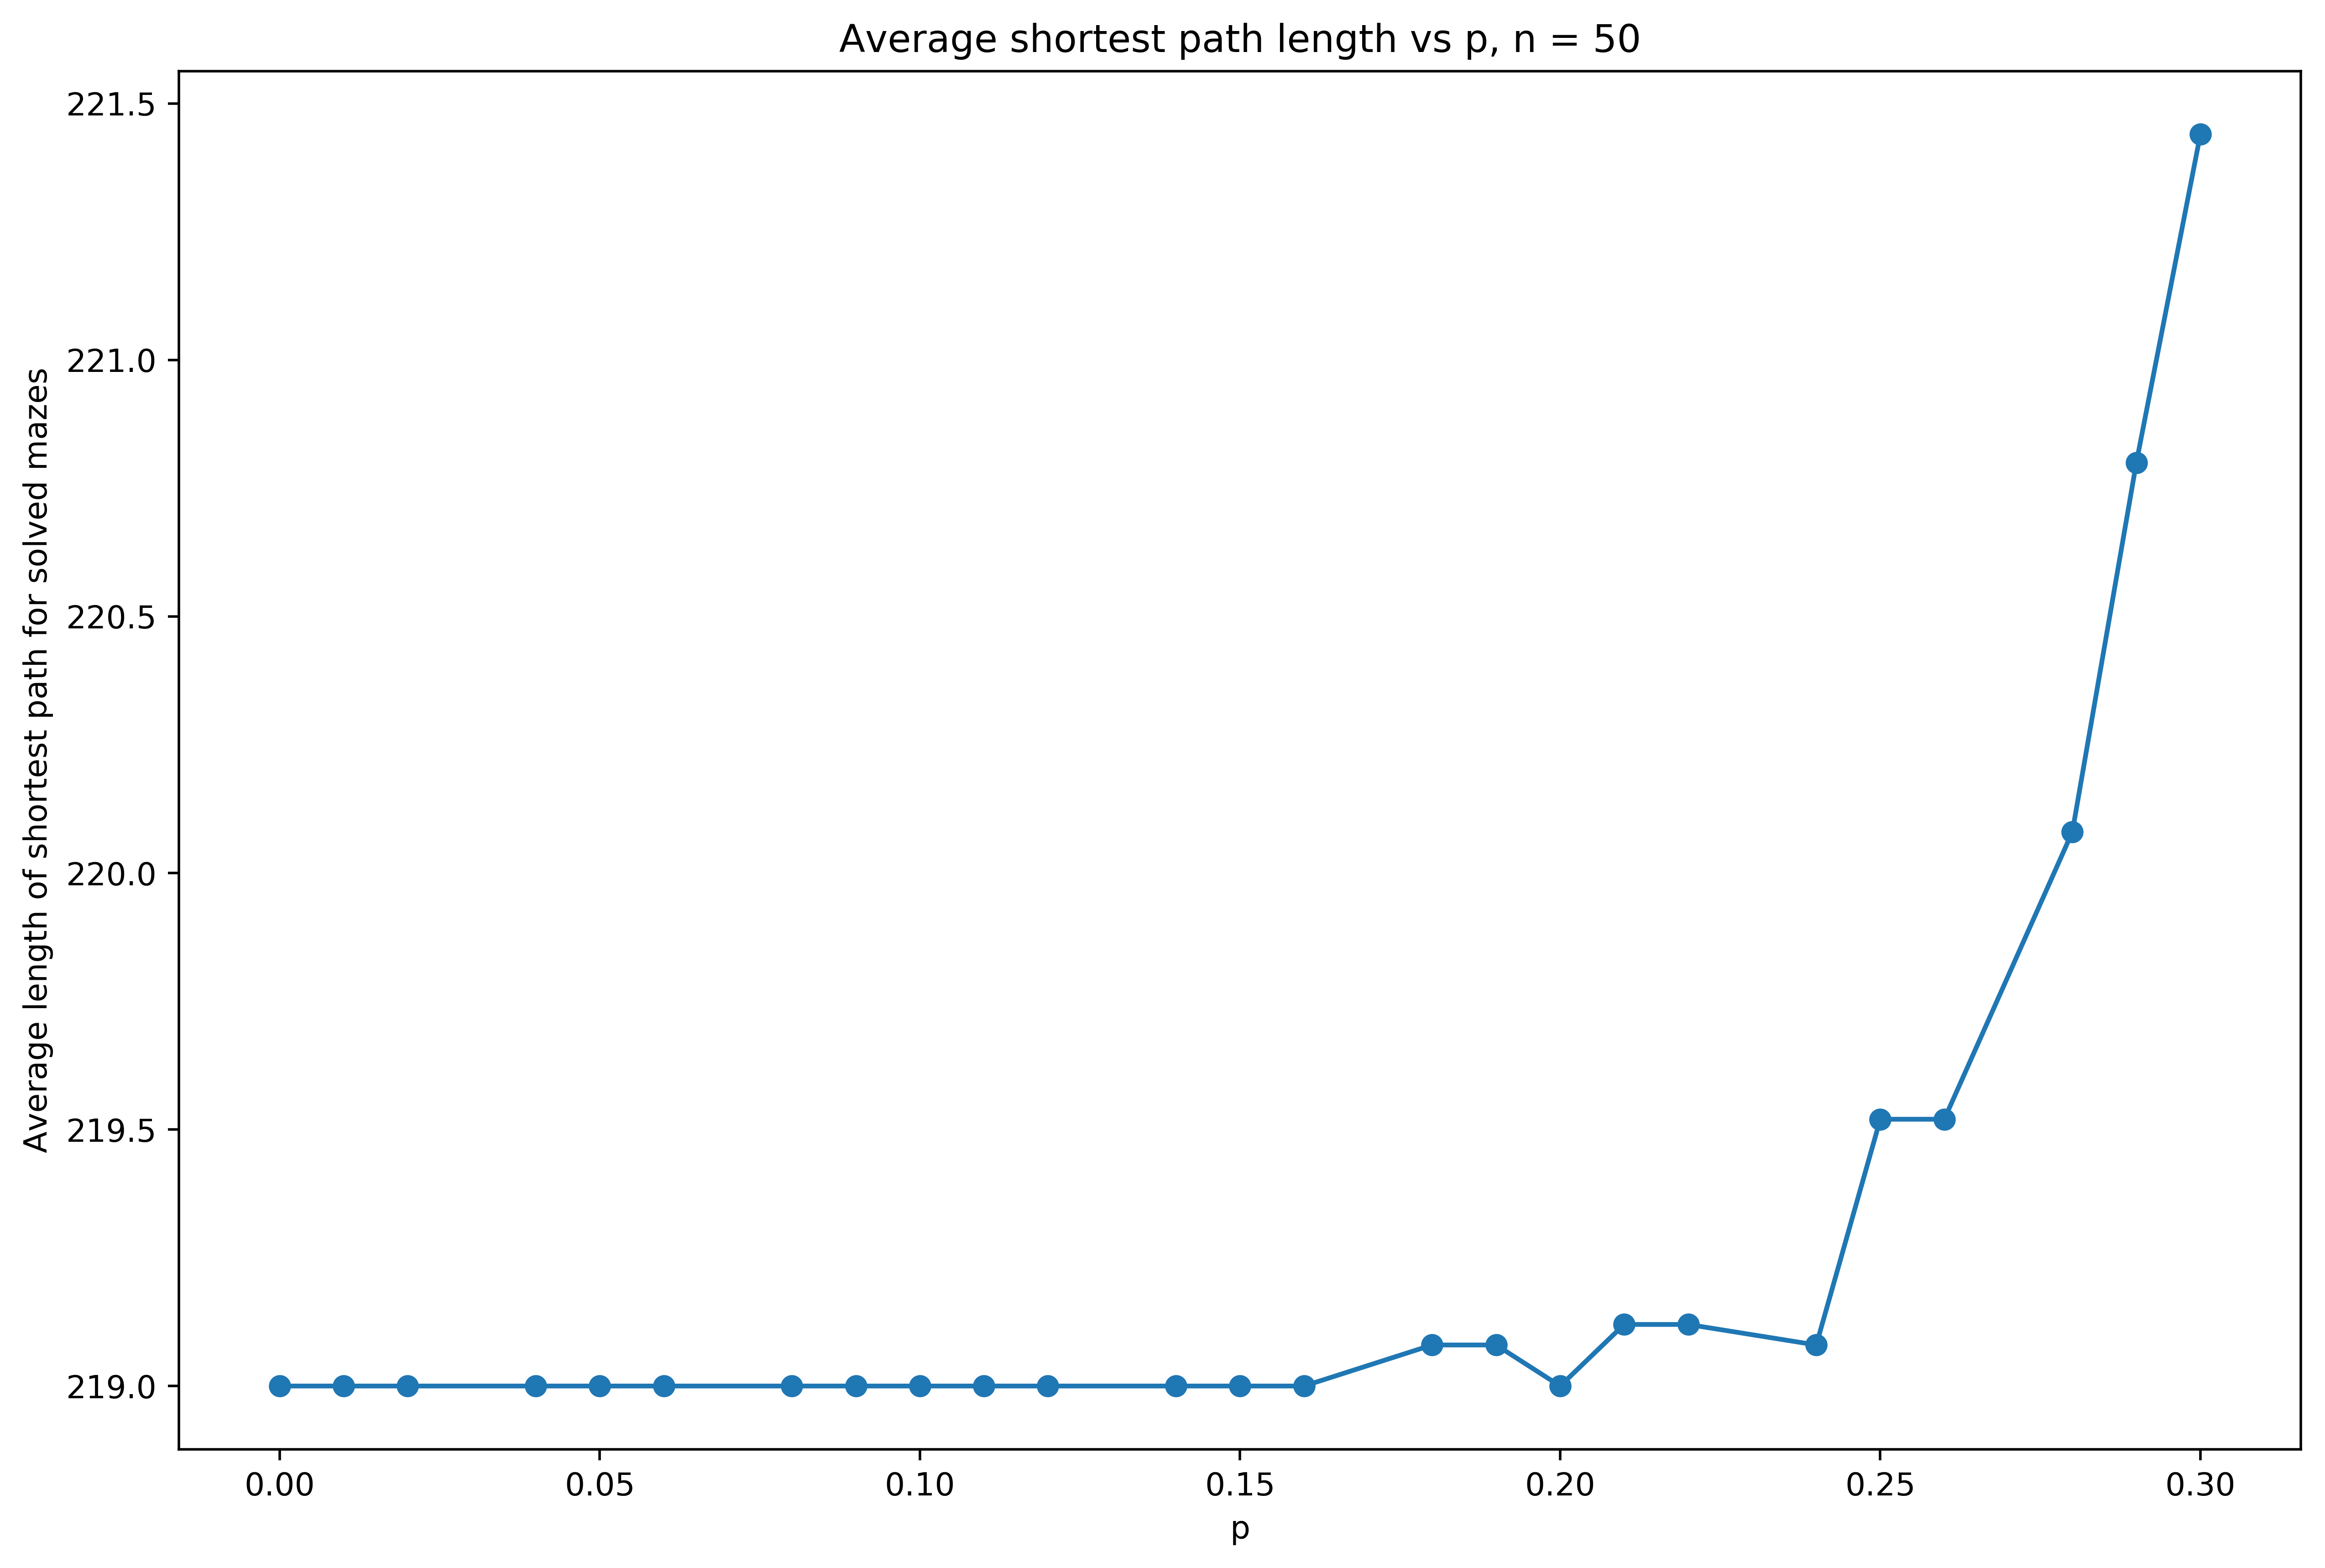

In [24]:
success_sample_size = 50
p_range = [round(p,2) for p in np.arange(0.0, p_0 + 0.0125, 0.0125)]
pvPath = []
for p in p_range:
    num_successes = 0
    total_path_length = 0
    while(num_successes < success_sample_size):
        result, path = bdBFS(generateMaze(dim,p))
        if path is not None:
            total_path_length += len(path)
            num_successes += 1
    pvPath.append(total_path_length / num_successes)
# make a nice DataFrame
pvPath_df = pd.DataFrame()
pvPath_df['p'] = p_range
pvPath_df['avg_sp_len'] = pvPath
# graph shortest path len vs p
plt.figure(figsize=(12,8), dpi=500)
plt.scatter(pvPath_df['p'].values, pvPath_df['avg_sp_len'].values)
plt.plot(pvPath_df['p'].values, pvPath_df['avg_sp_len'].values)
plt.xlabel('p')
plt.ylabel('Average length of shortest path for solved mazes')
plt.title('Average shortest path length vs p, n = {}'.format(success_sample_size))
plt.show()

As seen above, the shortest possible path occurs when the algorithm executes on an empty maze $(p=0.00)$. For our fixed $dim = 110$, this path is 219 cells. As $p$ increases towards $p_0=0.3$, the shortest path stays mostly constant until the interval $p \in [0.25,0.30]$, at which point the shortest path grows by around 3 cells to 222 cells long. 

However, note the scale of this graph: the shortest path is not fluctuating greatly in the range $p \in [0, 0.3]$. This implies that while shortest paths increase with $p$, this effect may not be significant. This is counter to the intuition that with higher $p$, and more blockages, the shortest path ought to meander dramatically more and take longer to reach the goal. Of course, the extremity of the blockages is up to random chance, determined by $p$, and so it is possible that our sample of generated mazes did not include many edge cases of extremely difficult mazes whose solutions have long paths.

Given a more powerful testing machine, we would re-run the above simulations with larger sample sizes and ranges of $p$ values to see if the weakly positive relationship between $p$ and shortest path length is more dramatic.

### Comparing A* heuristics

For the A* algorithm, we implemented two heuristics, which we will go into more depth in this section:

1. **Euclidean distance:** straight-line distance between two points $(x_1, y_1),(x_2,y_2)$.

$$d((x_1, y_1),(x_2,y_2)) = \sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

2. **Manhattan distance:** distance recovered from only making rectilinear moves between two points $(x_1,y_1),(x_2,y_2)$.

$$d((x_1, y_1),(x_2,y_2)) = |x_1-x_2| + |y_1-y_2|$$

Both of these heuristics are used by the A* algorithm to estimate the total remaining distance from a current cell to the goal cell in a maze. We wish to see which heuristic is more accurate in terms of estimating remaining distance. 

Optimality of a solved maze can be considered in terms of the number of nodes explored along the way to reach the goal state. In cases of failures, both algorithms will exhaust the same number of necessary nodes before terminating, so we only consider successes.

To compare these two heuristics, we simulate a set of successful maze solutions for a range of $p$ values and compare the ratio of the total number of visited nodes to the total number of nodes ($dim^2$), over $n = 50$ trials. This includes the path itself. We use the `numVisited(maze)` function which essentially scans a maze and returns the number of visited cells, i.e. all cells that are neither empty nor blocked.

Then, we wish to see if one heuristic uniformly explores fewer total nodes per simulation, over a variety of $p$.

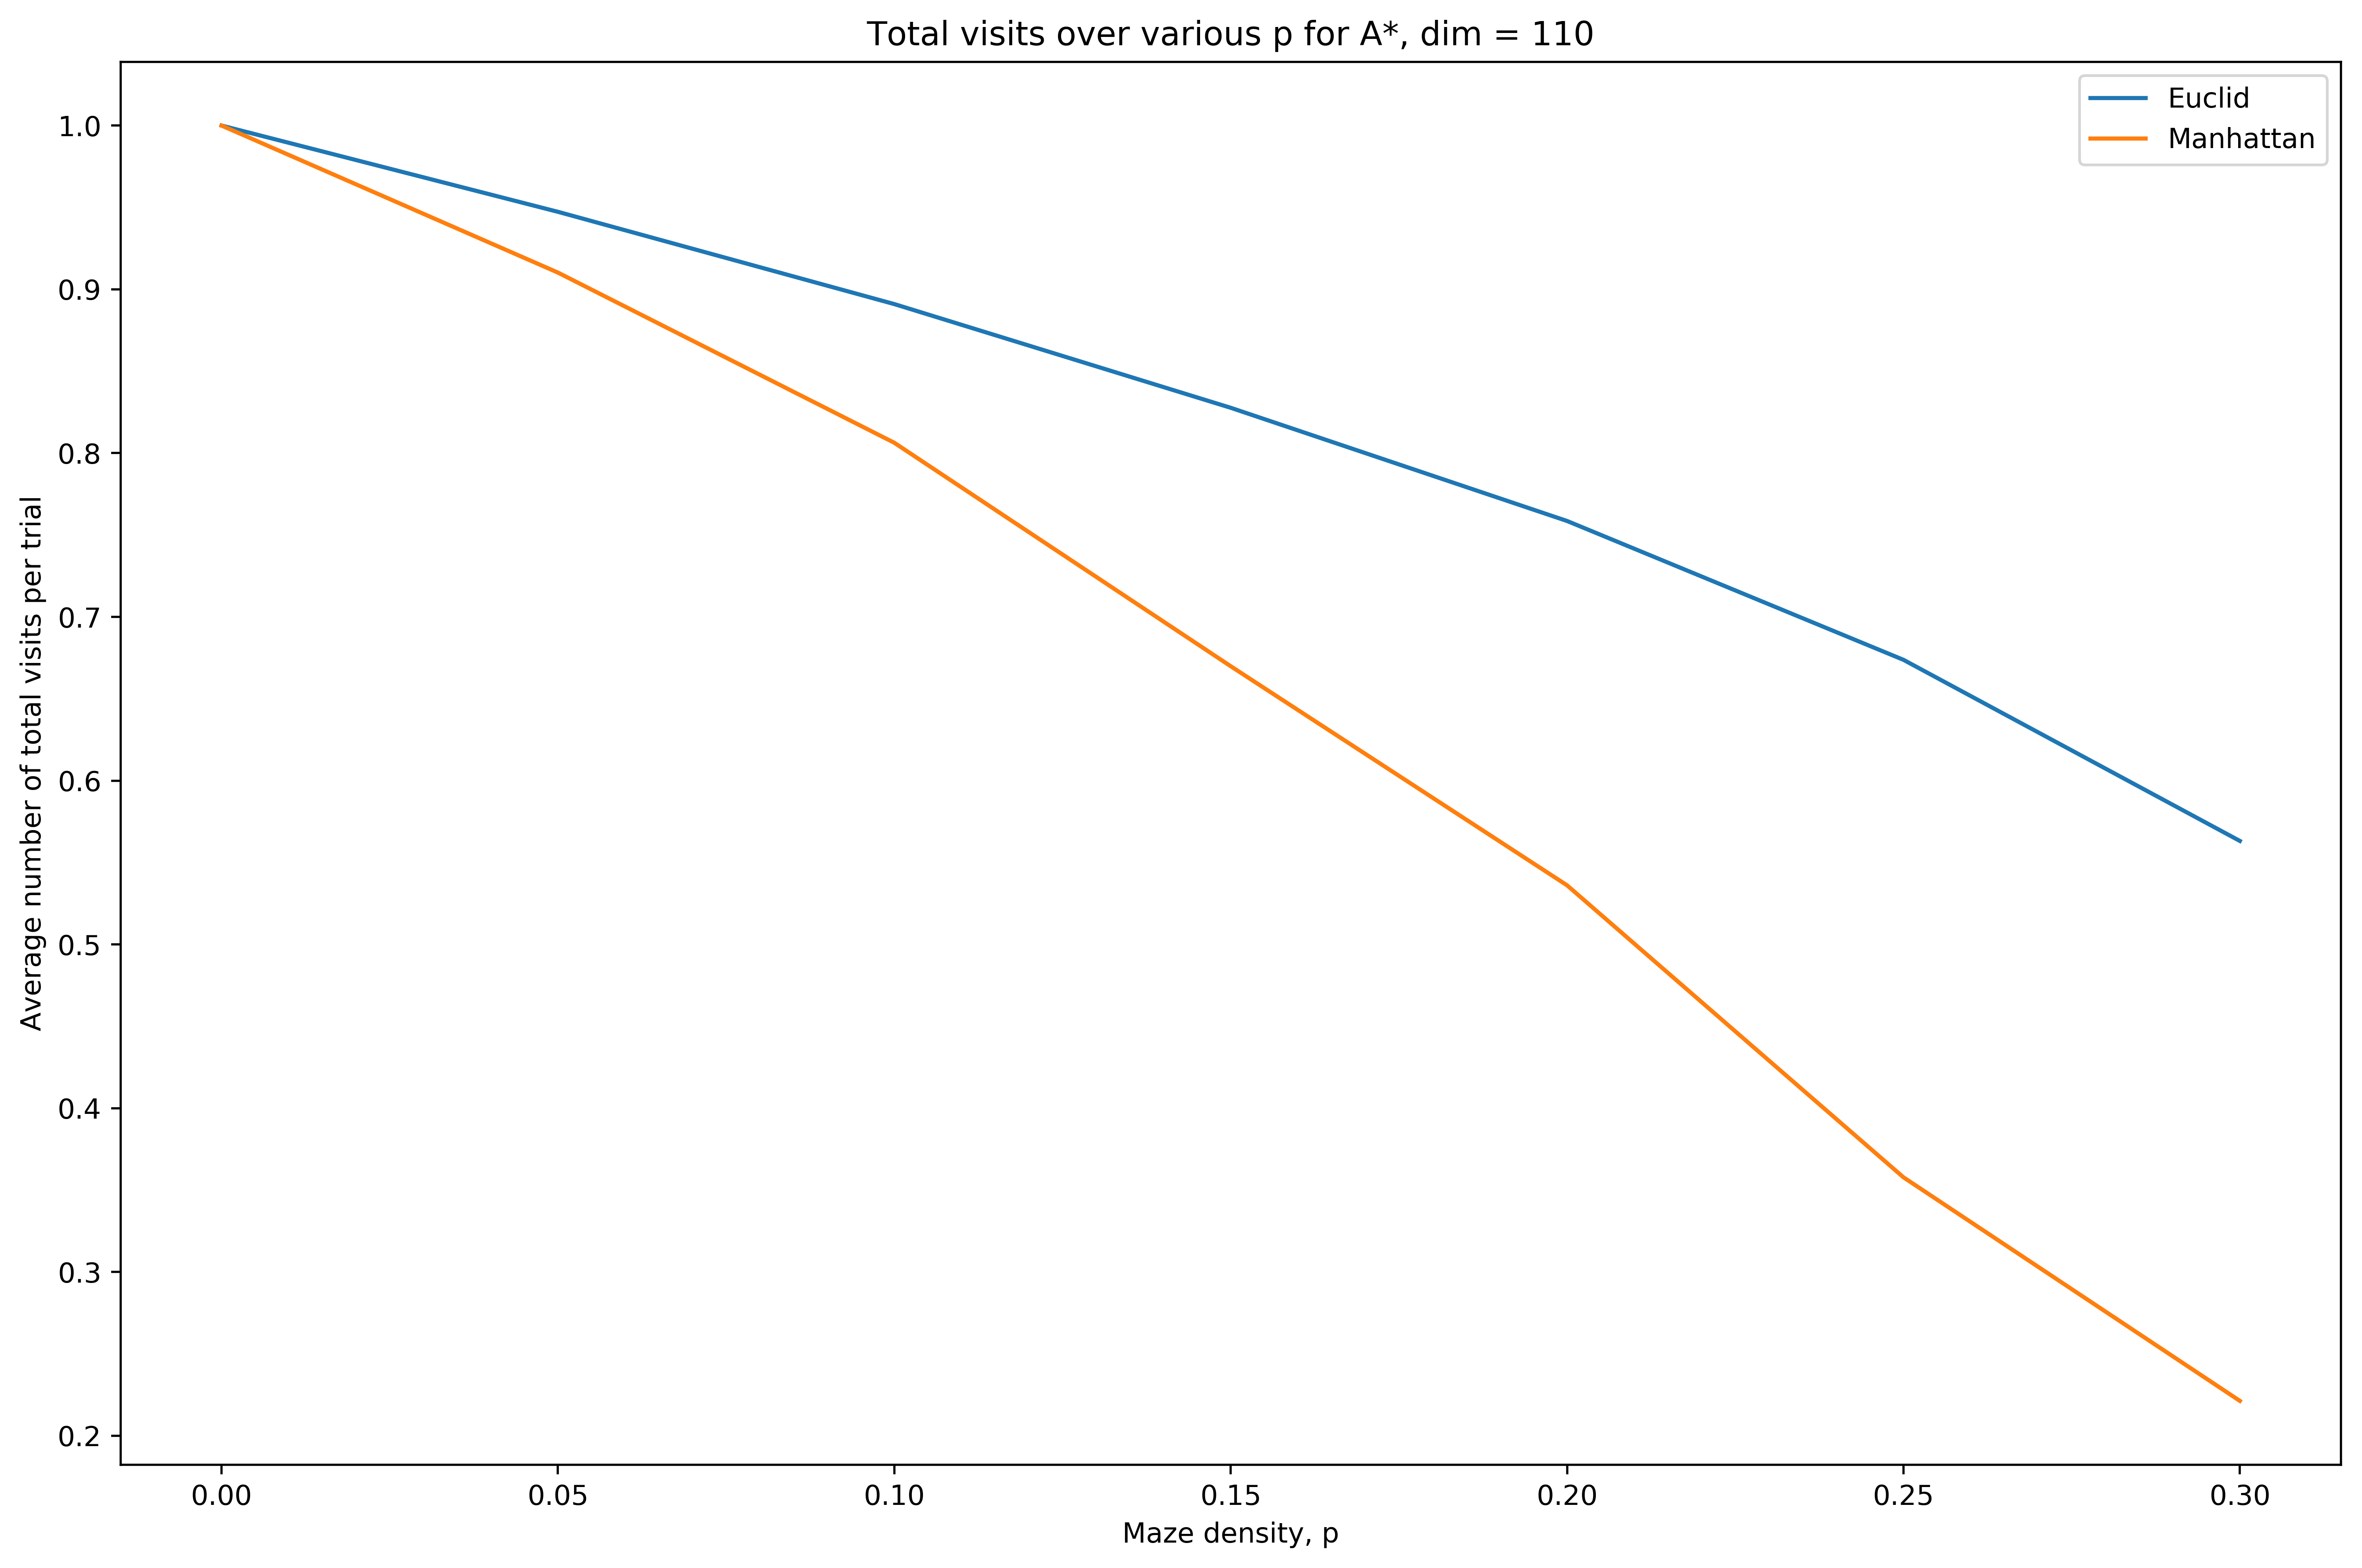

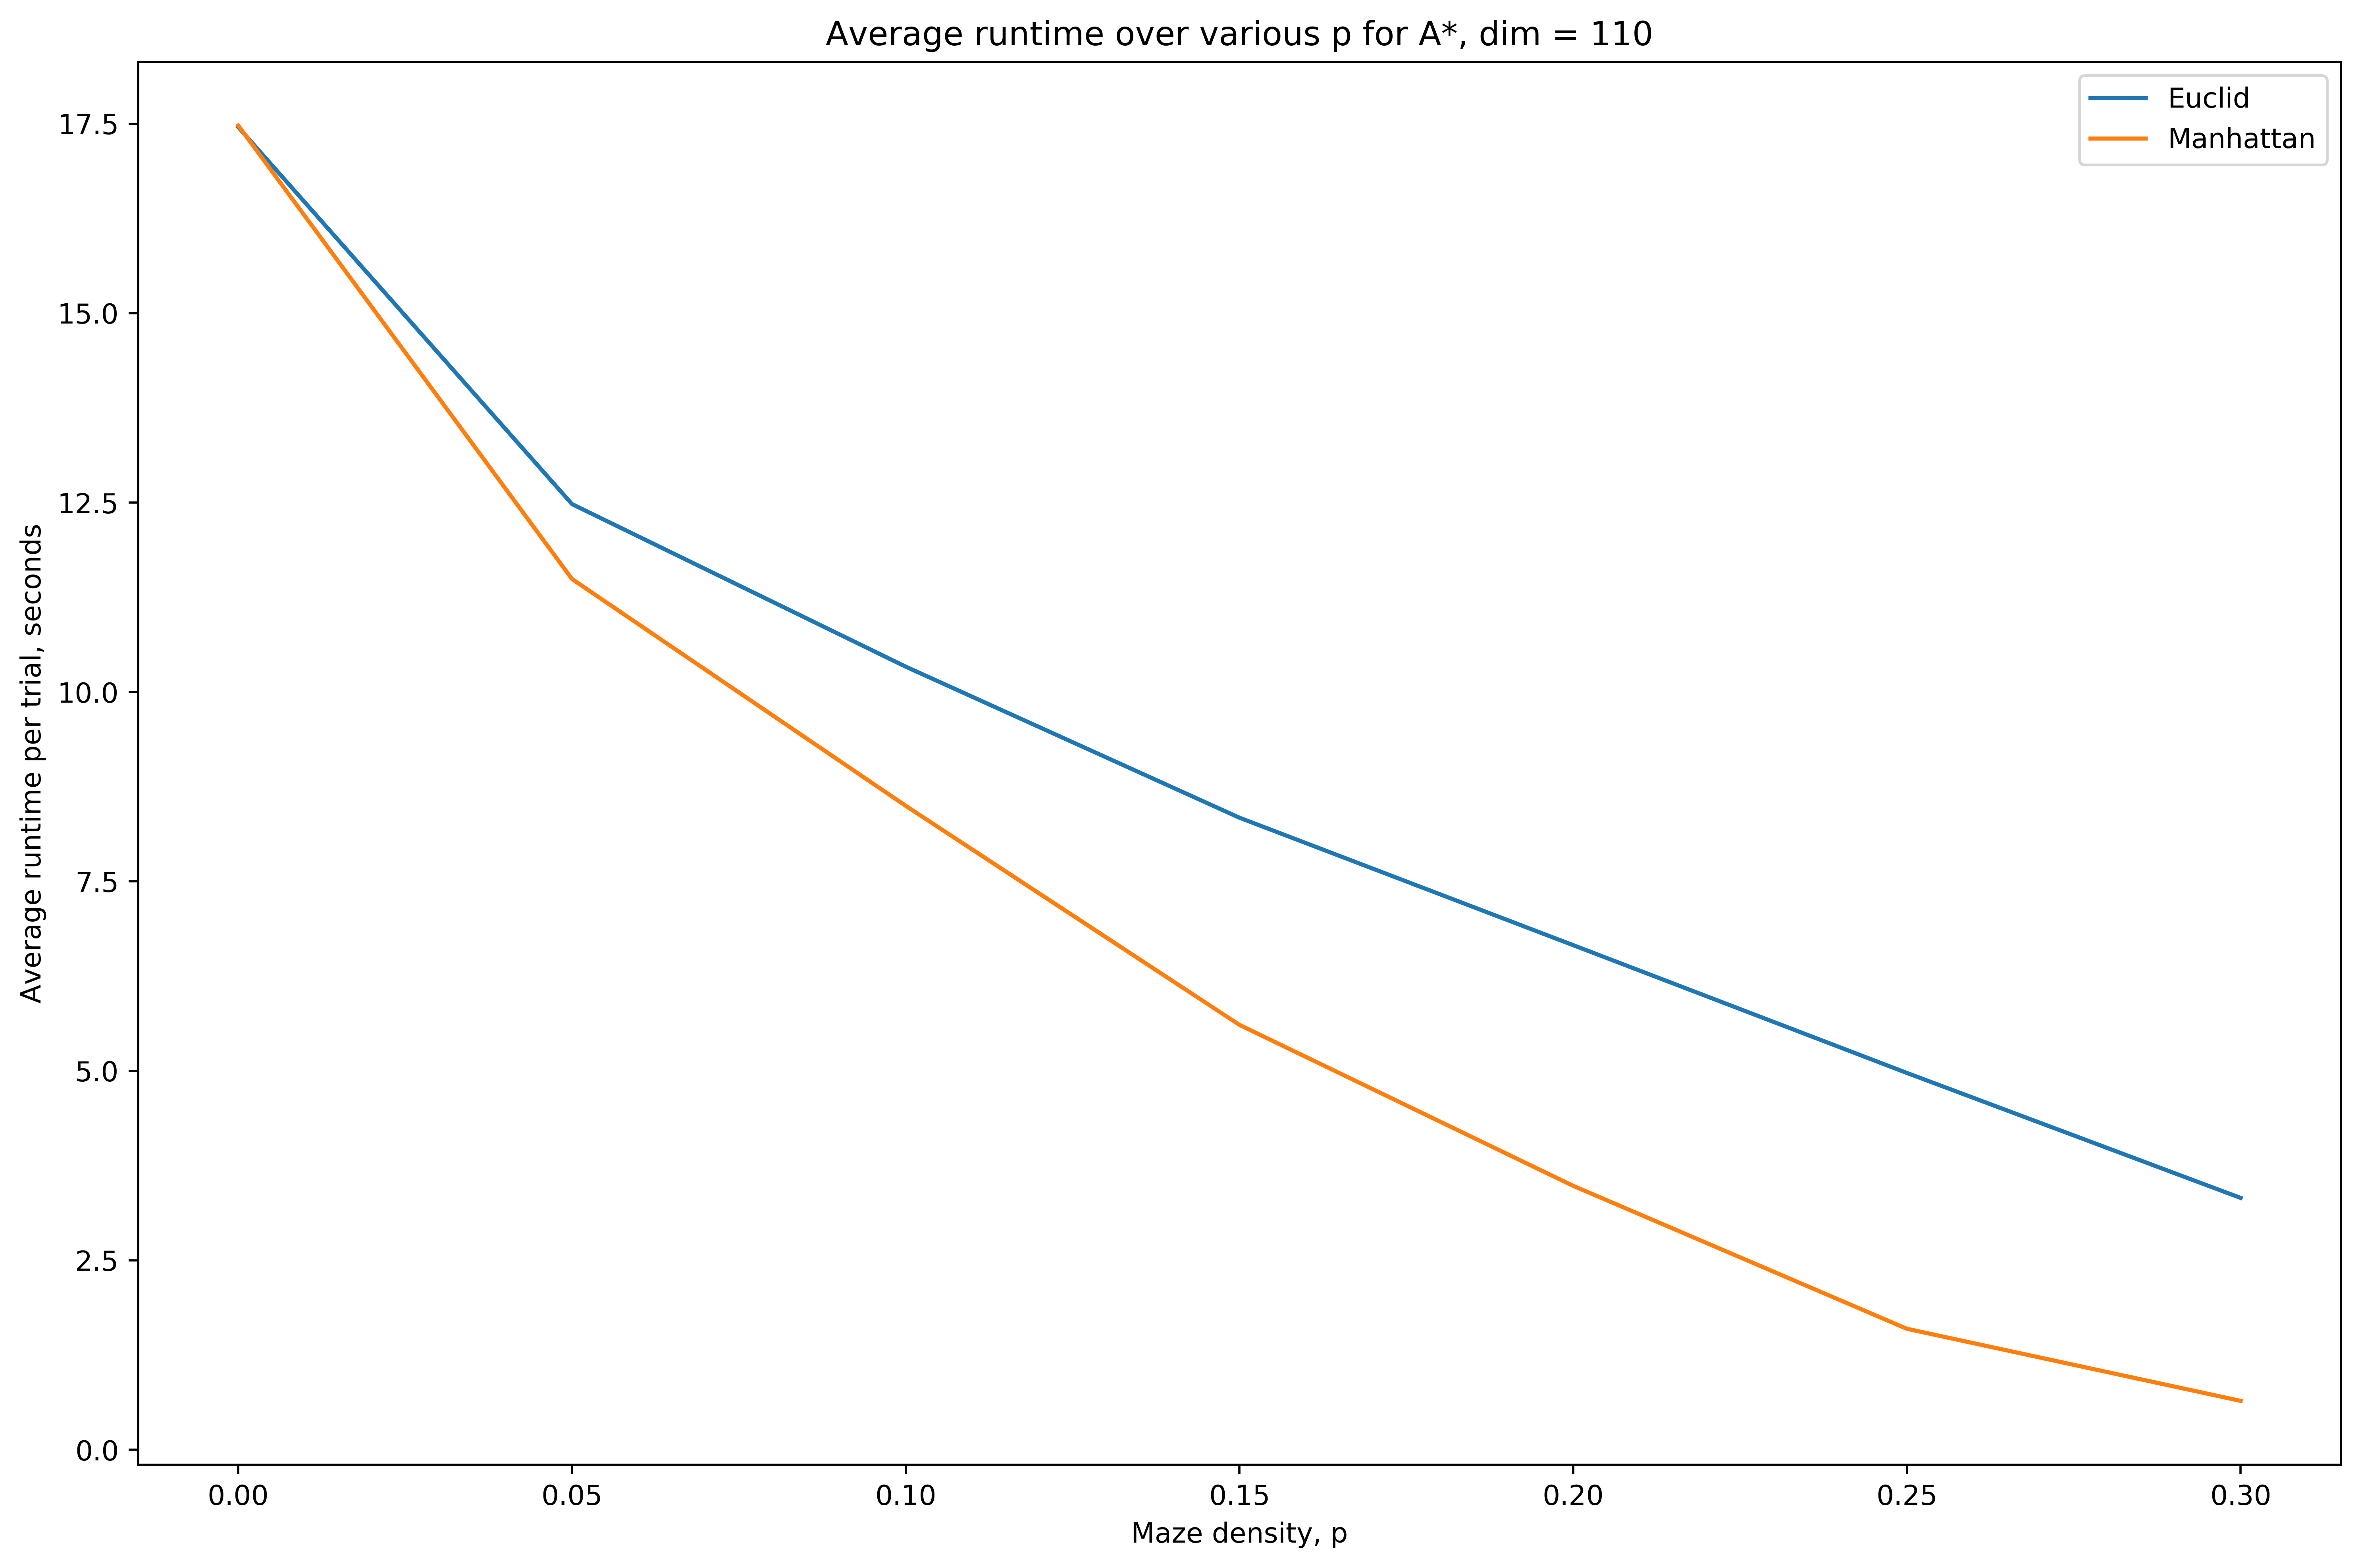

In [25]:
p_range = [round(p,2) for p in np.arange(0, p_0+0.05, 0.05)]
success_sample_size = 50
visits_euc = []
visits_man = []
times_euc = []
times_man = []
for p in p_range:
    euc_avg_visits, euc_avg_time, man_avg_visits, man_avg_time = aStarTrialDriver(dim, p, success_sample_size)
    visits_euc.append(euc_avg_visits)
    visits_man.append(man_avg_visits)
    times_euc.append(euc_avg_time)
    times_man.append(man_avg_time)
# make nice DataFrames of it
visits_df = pd.DataFrame()
visits_df['euc'] = visits_euc
visits_df['man'] = visits_man
visits_df.index = ['p = {}'.format(p) for p in p_range]
times_df = pd.DataFrame()
times_df['euc'] = times_euc
times_df['man'] = times_man
times_df.index = ['p = {}'.format(p) for p in p_range]
# graph visits v p
plt.figure(figsize=(12,8), dpi=500)
plt.plot(p_range, visits_df['euc'].values)
plt.plot(p_range, visits_df['man'].values)
plt.xlabel('Maze density, p')
plt.ylabel('Average number of total visits per trial')
plt.title('Total visits over various p for A*, dim = {}'.format(dim))
plt.legend(['Euclid', 'Manhattan'])
plt.tight_layout()
plt.show()
# graph runtime v p
plt.figure(figsize=(12,8), dpi=500)
plt.plot(p_range, times_df['euc'].values)
plt.plot(p_range, times_df['man'].values)
plt.xlabel('Maze density, p')
plt.ylabel('Average runtime per trial, seconds')
plt.title('Average runtime over various p for A*, dim = {}'.format(dim))
plt.legend(['Euclid', 'Manhattan'])
plt.tight_layout()
plt.show()

Evidently, the **Manhattan distance heuristic** is uniformly better than the **Euclidean distance heuristic** for maze-solving, in terms of both the lower number of visited nodes and lower runtimes. 

The Manhattan distance is more efficient and effective, because it is closer to the reality of the maze-solving problem. The Euclidean distance is the shortest distance possible in terms of $(x,y)$ coordinates, but any given path must travel rectilinearly, i.e. in some 'Manhattan'-style line of only up, down, left, or right turns. Therefore, the Manhattan distance heuristic informs the algorithm such that it does not underestimate remaining paths as much as it would with the Euclidean distance heuristic.

### Expected algorithm behavior

These algorithms compile and run, but we wish to ensure that each algorithm exhibits proper behavior with respect to its best and worst-case scenarios.

We explore how each algorithm performs for various mazes, in terms of metrics like length of solution path (i.e. is it a *shortest* path?) and number of total visited nodes.

In [4]:
from SampleMazes import *

Observe the following sample 50 by 50 maze:

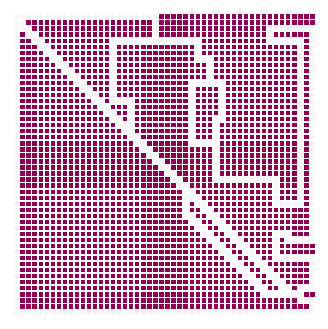

In [5]:
spMz = generateSPTest()
printMazeHM(spMz)

Here there are multiple solution paths - at least five of them. However, there are only two *shortest* paths, which are:

1. The L-shaped path going down the left side, hitting the bottom, turning right, and heading straight for the goal.
2. The diagonal path from source to goal.

We show that the algorithms behave as expected.

#### DFS

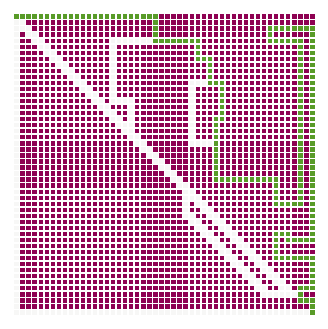

In [6]:
res, path = DFS(deepcopy(spMz))
printMazeHM(res)

**Shortest paths:** As expected, DFS is not guaranteed to take the shortest path. In this example, DFS actually took the longest possible path, solely because the source's right neighbor was visited before its bottom neighbor. The implications of the DFS fringe loading sequence is explored in the next section.

**Visited nodes:** Although DFS visited more nodes along the longer solution path, it did not visit any extraneous nodes that were not on the solution path. However, this is not always the case. As a brief aside, consider another sample maze:

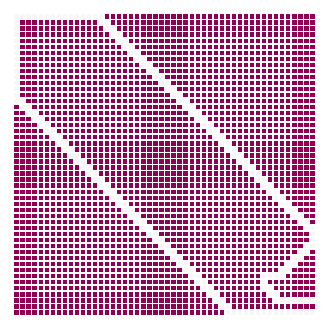

In [10]:
vnMz = generateVNTest()
printMazeHM(vnMz)

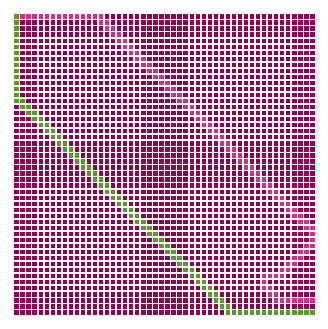

In [11]:
res, path = DFS(deepcopy(vnMz))
printMazeHM(res)

Now, it is apparent that DFS may sometimes explore unnecessary nodes. In this case, DFS explored the upper (pink) path all the way until its eventual failure just atop the goal node. Then, it had to backtrack to the source and explore the lower (green) solution path.

#### BFS

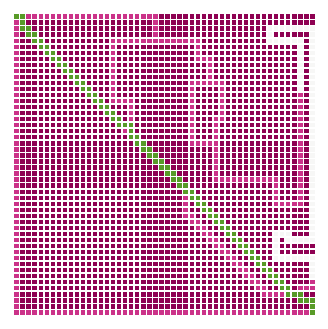

In [13]:
res, path = BFS(deepcopy(spMz))
printMazeHM(res)

In [14]:
len(path)

99

**Shortest paths:** The BFS algorithm returned the shortest path of length 99 that ran straight through the diagonal. 

**Visited nodes:** One can see that the BFS algorithm did in fact visit the bulk of the nodes on the longer solution paths, colored in pink. Because of the breadth-first approach, all of the longer paths were explored until the first solution (green), guaranteed to be the shortest, was found. Therefore, some inefficiency resulted from the algorithm having to check all neighbors of all nodes until a first (and shortest) solution was found.

#### BD-BFS

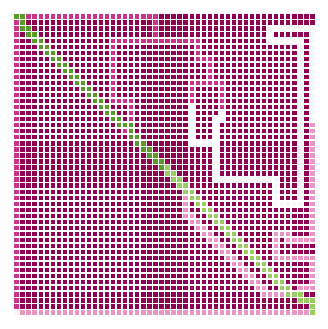

In [15]:
res, path = bdBFS(deepcopy(spMz))
printMazeHM(res)

In [16]:
len(path)

99

**Shortest paths:** Similarly to regular BFS, BD-BFS found the shortest path along the maze diagonal.

**Visited nodes:** In contrast to regular BFS, we see that BD-BFS visited far fewer nodes in the upper right-hand region of the maze. These nodes, along an obnoxiously long solution path, were not visited because of the algorithm's bi-directionality. There are really two searches occuring at once - one from the source-down, and one from the target-up. The target-up path explores several branches from the goal node, including one along the longest possible path. However, it (in light green) meets the source-down search (in dark green) along the shortest diagonal path faster than any other pink branches can meet.

That is, because the algorithm is leveraging the fact that it knows where the goal node is, it can avoid more costly visitations along other branches.

#### A*

A* (Euclid)


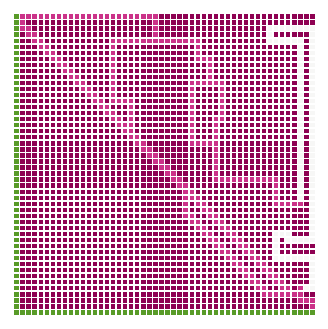

99 

A* (Manhattan)


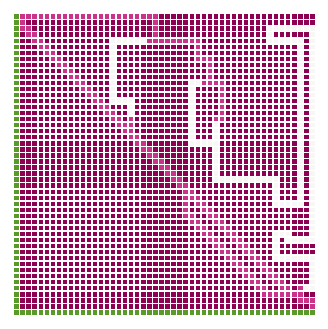

99 



In [18]:
print('A* (Euclid)')
res, path = A_star(deepcopy(spMz), dist_euclid)
printMazeHM(res)
print(len(path), '\n')

print('A* (Manhattan)')
res, path = A_star(deepcopy(spMz), dist_manhattan)
printMazeHM(res)
print(len(path), '\n')

**Shortest paths:** Both A* algorithms found a shortest path of length 99. Although it seems like A* found the L-shaped path on the bottom-left of the maze first, we can see how the shortest path along the diagonal was fully explored (for both heuristics) as well. It was just a matter of a few distance units, as per the Euclidean and Manhattan distance heuristics, which distinguished the returned shortest path from its alternative. This may even be due to maze construction.

**Visited nodes:** We can see that both A* heuristic algorithms visit fewer nodes than BD-BFS, BFS, and DFS. This is expected, as A* selects elements off the fringe not based on sequence of fringe loading or visited neighbors but rather based on: total length traveled from source + estimated length remaining to goal. The use of these heuristics and a priority queue to order fringe elements proves useful in this scenario in reducing visited nodes. 

However, just as shown and discussed in the previous section, we see that the Manhattan distance heuristic leads to fewer nodes visited overall. This suggests that, for this domain of maze-solving problems, the Euclidean distance heuristic cannot be admissible, i.e. the Euclidean heuristic overestimates at least one node's remaining distance to goal. 

**Pf:** Assume, on the contrary, that the Euclidean distance heuristic was admissible. Then the Euclidean A* algorithm would be optimal, and it would explore the minimal number of nodes possible. But we have just seen that the Manhattan distance A* algorithm explores fewer nodes in at least one case, i.e. this case. This contradicts the optimality of Euclidean A*. Therefore, the Euclidean distance heuristic must not be admissible for A* in maze solving problems. Q.E.D.

**Note:** By this logic, it may or may not be true that the Manhattan distance heuristic is admissible.

### Improving DFS via fringe tweaks

In DFS, the order of which neighboring nodes are loaded onto a fringe matters in the sense that the more recent nodes will be explored and backtracked to first. That is, suppose a node $X(i,j)$ has valid neighbors $N_R(i,j+1), N_L(i,j-1), N_D(i+1, j), N_U(i-1,j)$, where R, L, D, and U correspond to moving right, left, down, and up one cell. These neighbors loaded into the fringe in that order. Then, the algorithm will select $N_R$ and expand as deep as possible along that line, before possibly backtracking back to $N_L$ and repeating, back to $N_D$ and repeating, etc. 

However, loading ${N_R, N_L, N_D, N_U}$ in any other sequence would lead to different visitation sequences. This sequence of visited neighbors is not trivial, because suppose exploring $N_D$ leads to the goal node first whereas exploring $N_R, N_L, N_U$ lead to failures and backtracking. If $N_D$ is loaded onto the fringe first, then the algorithm will reach the goal node faster. The idea is that some directions are more beneficial than others.

One way to exploit this is to recognize that in order to reach the goal node from the start node in our maze runner game, the path will, in terms of net change in $(x,y)$ position, go down and to the right. Of course, sometimes a path will have to go up or left in order to circumvent some wall. This assumption is a generality which, although not true for every single node considered, is true in general of any successful path, since the goal is down and to the right of the start.

Hence, we can assume that as a whole, neighbors $N_D, N_R$ will provide more maze-solving utility than neighbors $N_U, N_L$, because those neighbors are closer to the goal, so we ought to load $N_D, N_R$ onto the fringe first.

First, we show that our current algorithm, which considers neighbors in the sequence $(N_R, N_D, N_U, N_L)$ has lower average runtimes than one which considers neighbors in the reversed sequence ($N_L, N_U, N_D, N_R$). The order of $N_R, N_D$ is trivial, so long as they are ahead of $N_U, N_L$.

We use a driver method `dfsTrialDriver(dim, p, n)` which runs $n = 50$ trials of two versions of DFS running on the same maze per trial, and returns average runtime per trial for each. This driver calls the following methods:

1. The same `DFS(maze)` function as used above, which considers neighbors in the order $(N_R, N_D, N_U, N_L)$.
2. The `DFS_leftUp(maze)` function, which considers neighbors in the reversed order ($N_L, N_U, N_D, N_R$).

**Note:** Unlike the analysis of A* in which only successes were considered, failures matter here because the order of the neighbors in the fringe is intimately related to backtracking (in case of failed explorations). So here, we consider average runtime for both successes and failures.

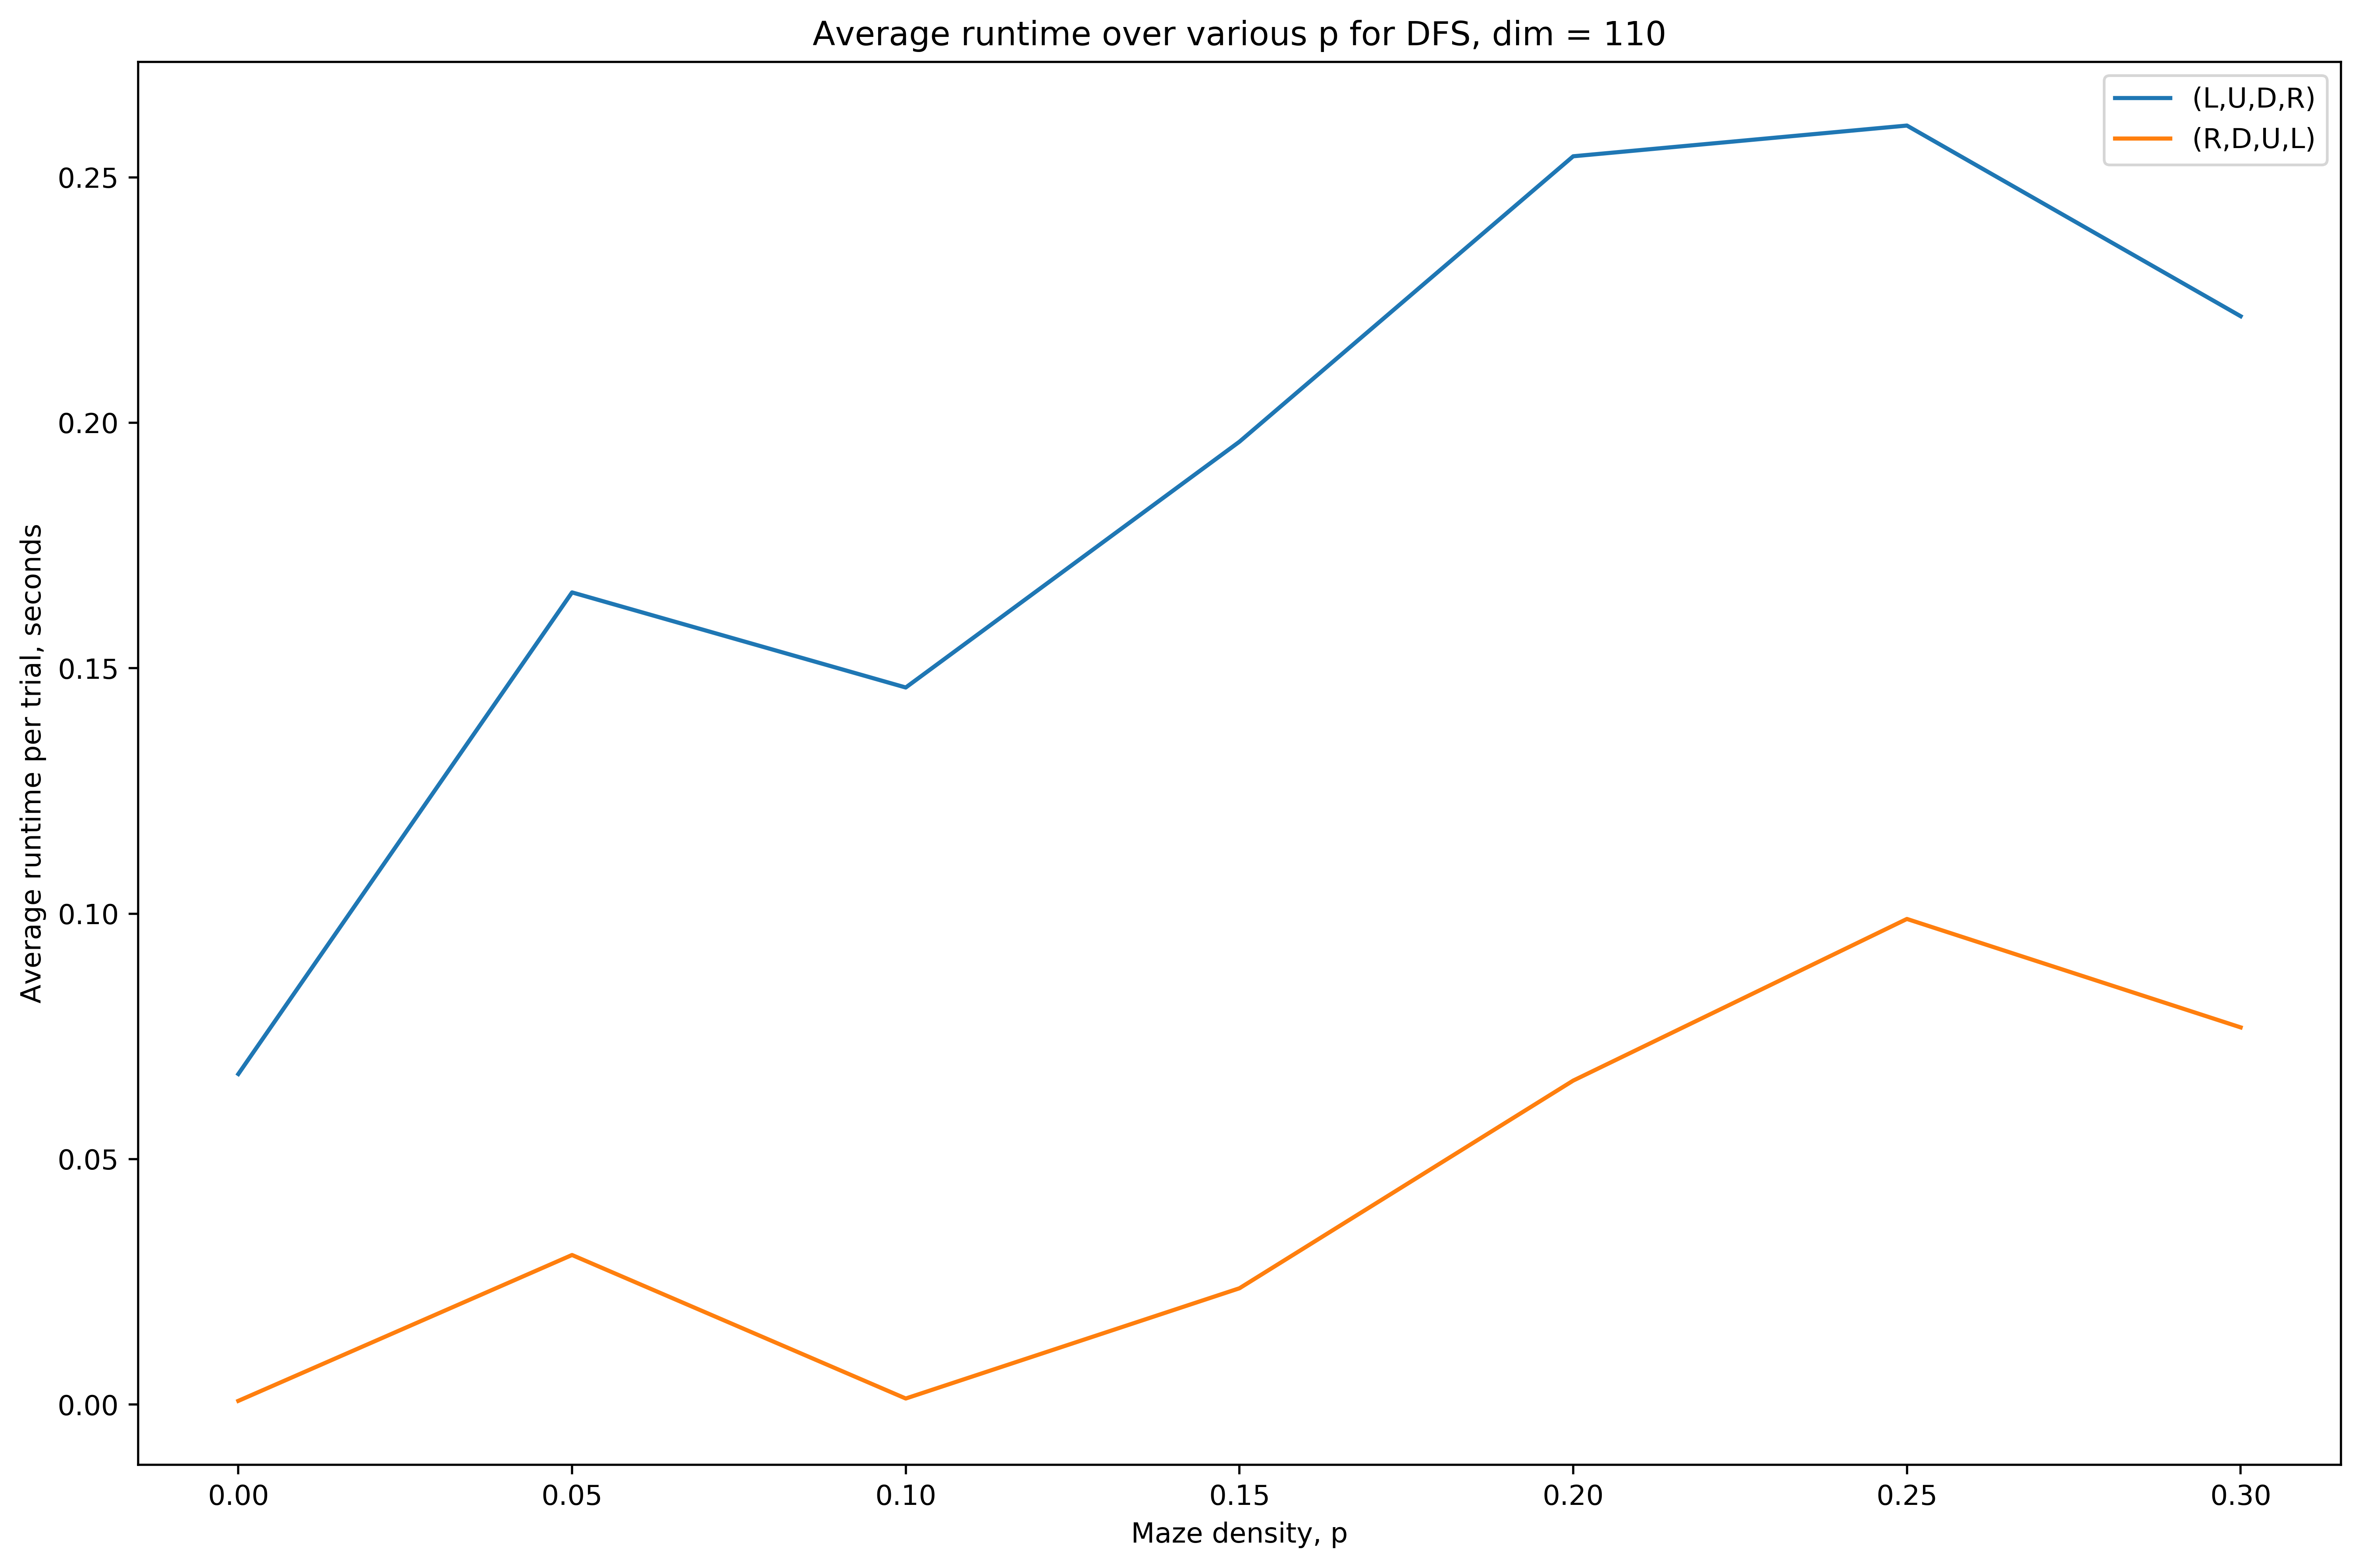

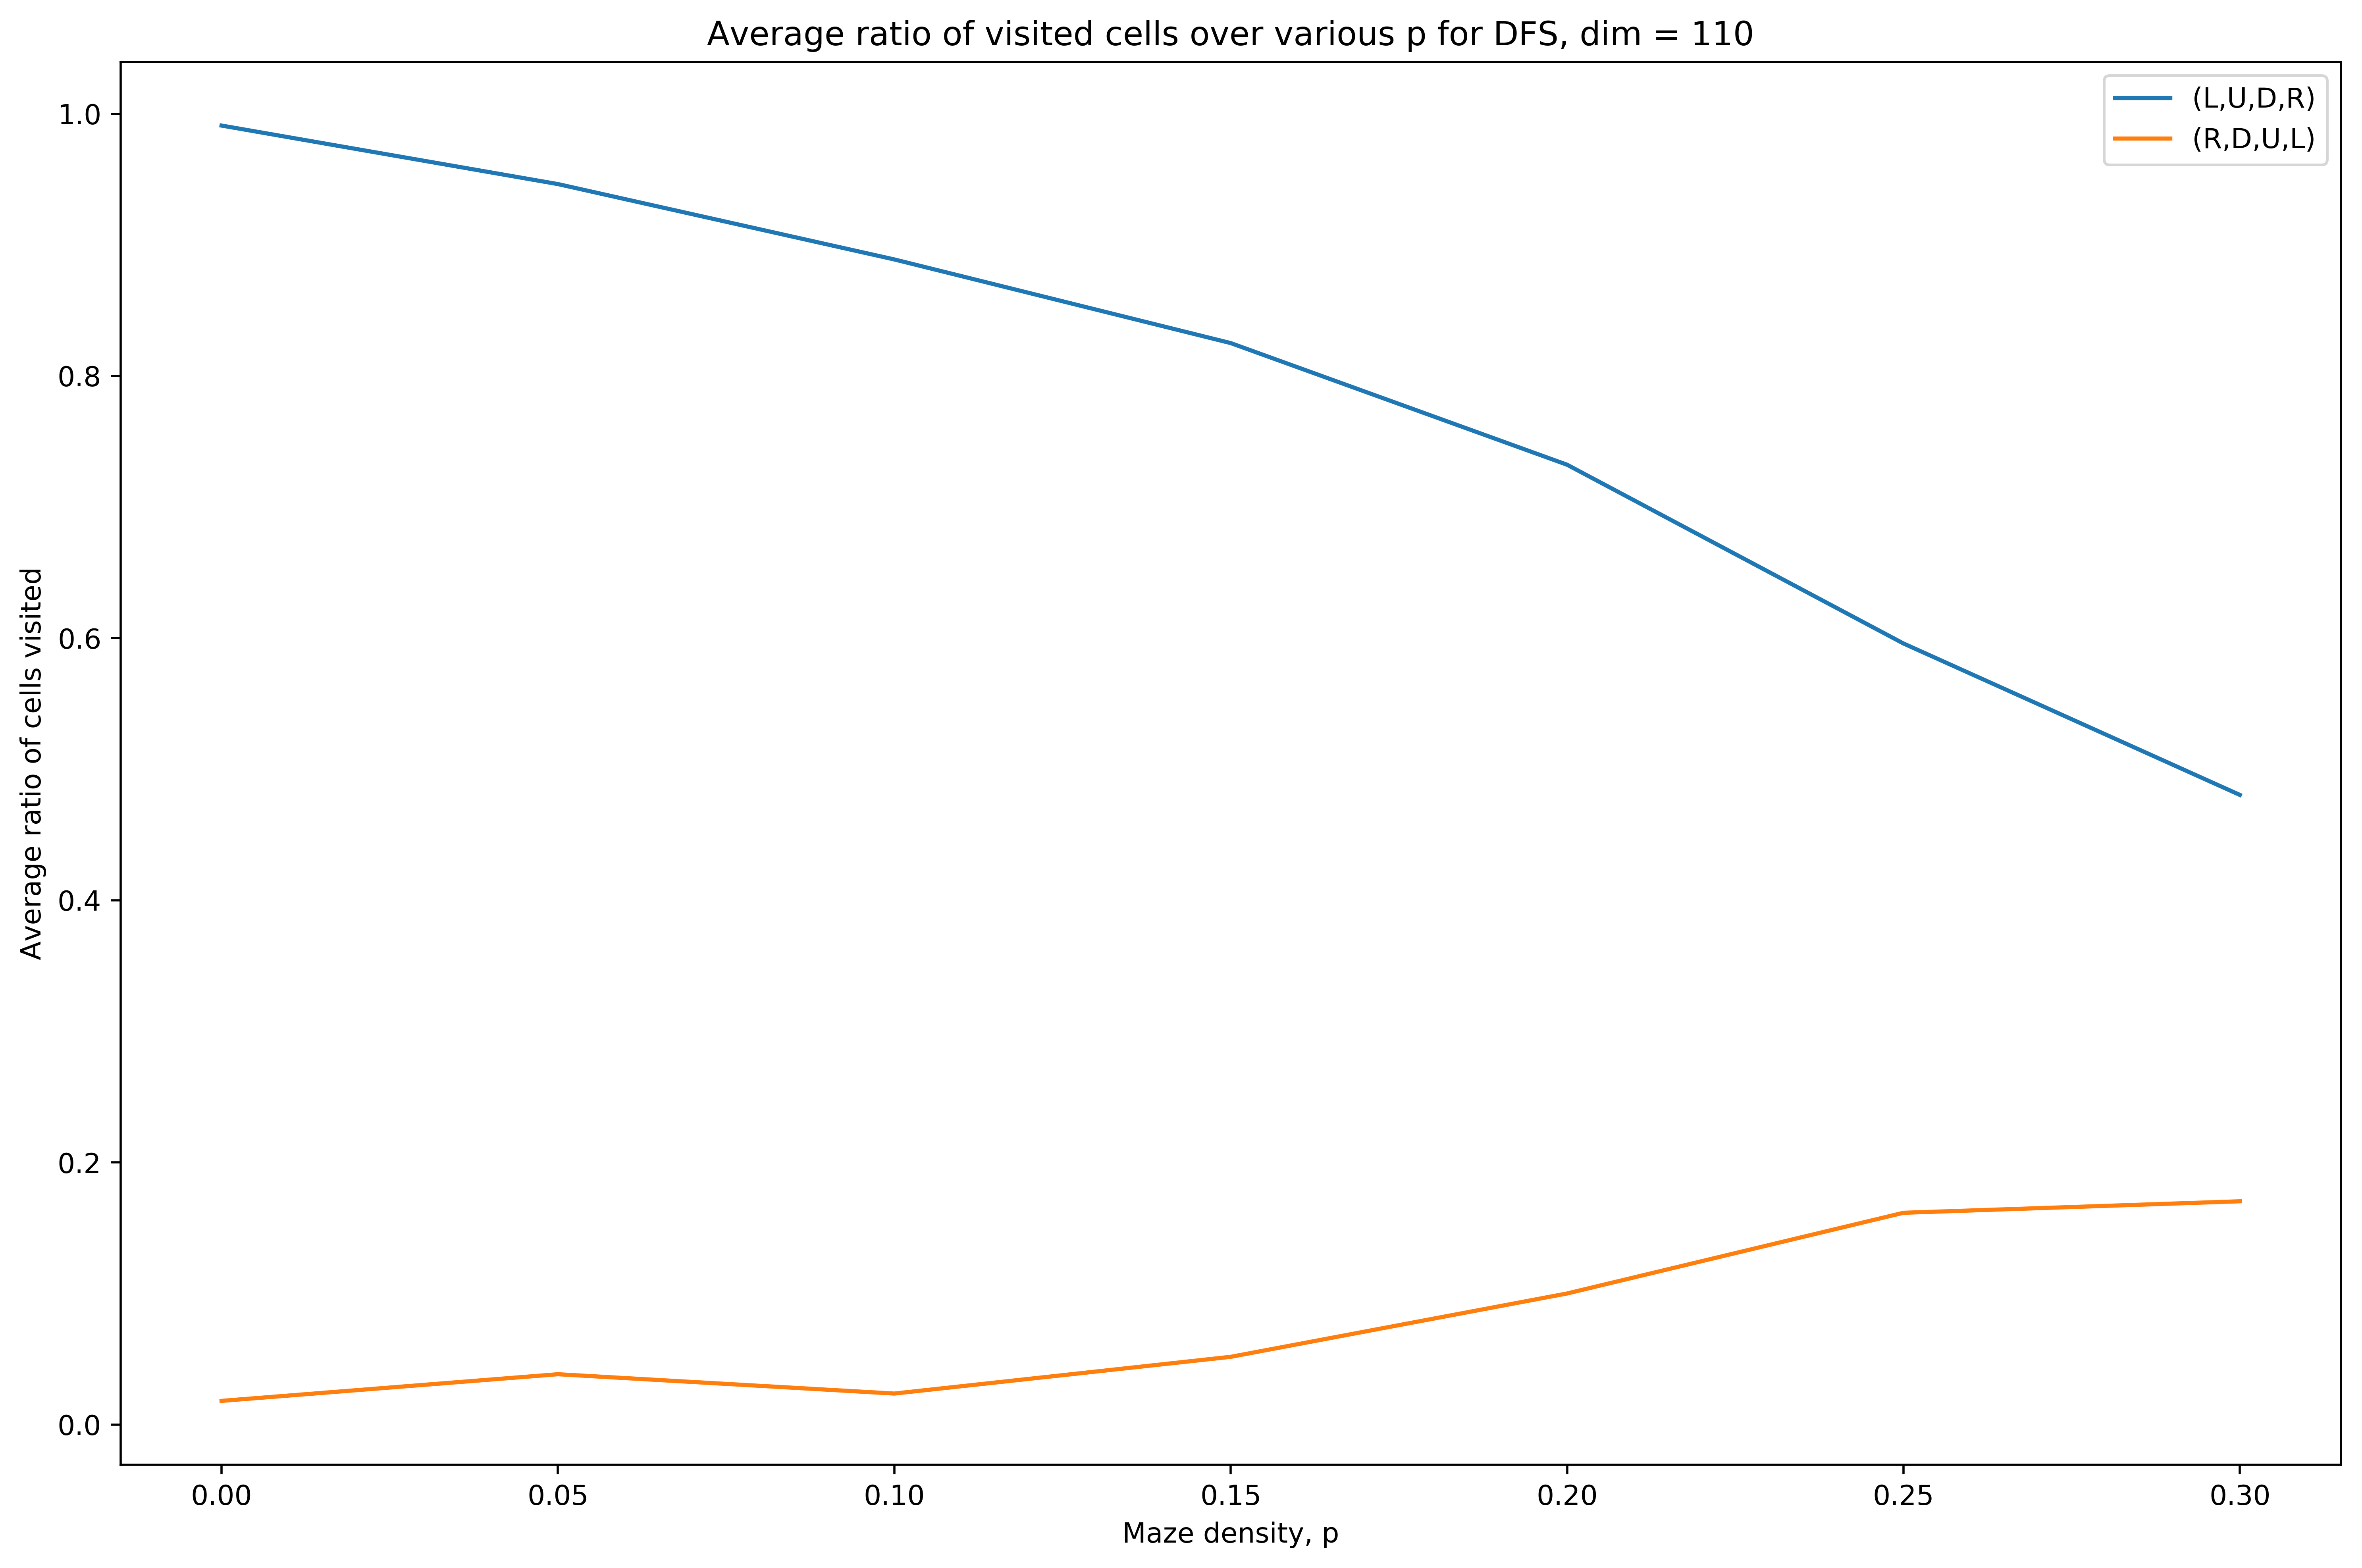

In [4]:
p_range = [round(p,2) for p in np.arange(0, p_0+0.05, 0.05)]
n = 50
times_RD = []
times_LU = []
visited_RD = []
visited_LU = []
for p in p_range:
    rd_avgTime, lu_avgTime, rd_avg_visited, lu_avg_visited = dfsTrialDriver(dim, p, n)
    times_RD.append(rd_avgTime)
    times_LU.append(lu_avgTime)
    visited_RD.append(rd_avg_visited)
    visited_LU.append(lu_avg_visited)
# Make nice DataFrames
DFStimes_df = pd.DataFrame()
DFStimes_df['RD'] = times_RD
DFStimes_df['LU'] = times_LU
DFStimes_df.index = ['p = {}'.format(p) for p in p_range]
DFSvisits_df = pd.DataFrame()
DFSvisits_df['RD'] = visited_RD
DFSvisits_df['LU'] = visited_LU
# graph runtime v p
plt.figure(figsize=(12,8), dpi=500)
plt.plot(p_range, DFStimes_df['LU'].values)
plt.plot(p_range, DFStimes_df['RD'].values)
plt.xlabel('Maze density, p')
plt.ylabel('Average runtime per trial, seconds')
plt.title('Average runtime over various p for DFS, dim = {}'.format(dim))
plt.legend(['(L,U,D,R)', '(R,D,U,L)'])
plt.tight_layout()
plt.show()
# graph visits v p
plt.figure(figsize=(12,8), dpi=500)
plt.plot(p_range, DFSvisits_df['LU'].values)
plt.plot(p_range, DFSvisits_df['RD'].values)
plt.xlabel('Maze density, p')
plt.ylabel('Average ratio of cells visited')
plt.title('Average ratio of visited cells over various p for DFS, dim = {}'.format(dim))
plt.legend(['(L,U,D,R)', '(R,D,U,L)'])
plt.tight_layout()
plt.show()

From above, we have shown that considering neighbors in the sequence $(N_R, N_D, N_U, N_L)$ yields a lower runtime and ratio of average cells visited per maze than considering neighbors in the sequence $N_L, N_U, N_D, N_R$).

In other words, visiting neighbors down or to the right before visiting neighbors left and up reduced runtime and the total number of visited cells.

Interestingly, it appears that for $p > p_0$, the ratio of visited cells for both RD-first and LU-first DFS would decrease and converge. This is likely because maze solvability decreases dramatically for $p > p_0$.

### Visitation habits of BD-BFS and A*

For a given map, BD-BFS and A* both visit many nodes in order to reach a solution. We wish to see if BD-BFS expands nodes which A* does not. 

Consider the following example maze:

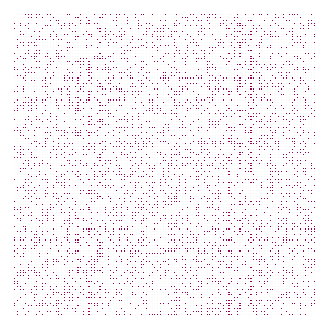

In [11]:
mz = generateMaze(dim, p_0)
printMazeHM(mz)

The above maze is solvable. We proceed with running BD-BFS and A* (both Euclidean and Manhattan distance heuristics).

BD-BFS


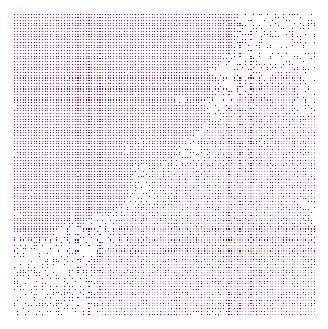

A* - Euclid


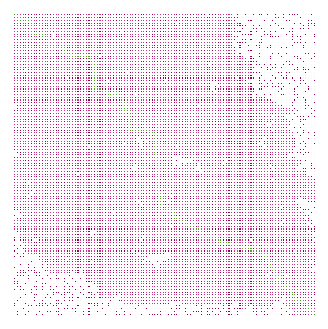

A* - Manhattan


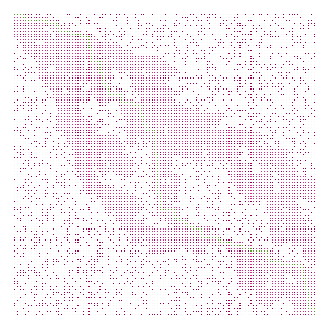

In [13]:
mz1 = deepcopy(mz)
mz2 = deepcopy(mz)
mz3 = deepcopy(mz)

print('BD-BFS')
bdBFS_res, bdBFS_path = bdBFS(mz1)
printMazeHM(bdBFS_res)

print('A* - Euclid')
AEuc_res, AEuc_path = A_star(mz2, dist_euclid)
printMazeHM(AEuc_res)

print('A* - Manhattan')
AMan_res, AMan_path = A_star(mz3, dist_manhattan)
printMazeHM(AMan_res)

As seen above, there are nodes that BD-BFS expands that A* does not (and vice versa).

Observe the white spaces above, which denote unvisited nodes. For BD-BFS, there are stretches of unvisited nodes from the top right to the bottom left of the map, including a strip along those two vertices. These nodes are visited by both A* algorithms. 

On the other hand, A* does not visit nodes further along the bottom right of the map which BD-BFS does. Compare A* - Manhattan to BD-BFS: A* - Manhattan has many unvisited nodes on the top right and bottom left corners which BD-BFS does in fact visit.

This is because BD-BFS expands in all directions based on the fact that it must visit all neighbors of a given current node. It does not visit neighbors in any particular order; in fact it must visit all of them. Consequently, the produced solution maze explores all neighbors from the source and from the target (bi-directionality), both of which are visualized excellently as "meeting" at the middle when the paths cross.

On the other hand, A* will selectively visit neighbors in one direction based on which one has the lowest estimated cost. This is where the Euclidean and Manhattan distance heursitics come into play: the heuristics "inform" the algorithm to choose certain paths to minimize the remaining blocks it needs to visit to reach the goal. 

As seen above, these heuristics are beneficial in ordering the fringe in the sense that the A* paths appear to visit fewer nodes. This is especially true of A* using the **Manhattan distance heuristic**, which ultimately visits the fewest nodes of the three algorithms to reach the goal node.

## Finding the Hardest Maze